In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from collections import Counter 

In [263]:
from sklearn.metrics import make_scorer
import pickle

In [4]:
from sklearn.metrics import precision_score, recall_score

In [4]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score,roc_auc_score

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('Train.csv')

In [7]:
data.head() #to display the first 5 rows of the data

patient_id patient_race  payer_type patient_state  patient_zip3   Region  \
0      268700          NaN  COMMERCIAL            AR           724    South   
1      484983        White         NaN            IL           629  Midwest   
2      277055          NaN  COMMERCIAL            CA           925     West   
3      320055     Hispanic    MEDICAID            CA           900     West   
4      190386          NaN  COMMERCIAL            CA           934     West   

             Division  patient_age patient_gender    bmi  ...  \
0  West South Central           39              F    NaN  ...   
1  East North Central           55              F  35.36  ...   
2             Pacific           59              F    NaN  ...   
3             Pacific           59              F    NaN  ...   
4             Pacific           71              F    NaN  ...   

  Average of Apr-18 Average of May-18 Average of Jun-18 Average of Jul-18  \
0             52.55             74.77             79.96             81.69   
1             49.30             72.87             77.40             77.43   
2             68.50             70.31             78.61             87.24   
3             63.34             63.10             67.45             75.86   
4             59.45             60.24             64.77             69.81   

  Average of Aug-18  Average of Sep-18  Average of Oct-18  Average of Nov-18  \
0             78.30              74.56              59.98              42.98   
1             75.83              72.64              58.36              39.68   
2             85.52              80.75              70.81              62.67   
3             75.24              71.10              68.95              65.46   
4             70.13              68.10              65.38              60.72   

   Average of Dec-18  metastatic_diagnosis_period_bucket  
0              41.18                Greaterthan 3 months  
1              39.71                     Within 3 months  
2              55.58                Greaterthan 3 months  
3              59.46                Greaterthan 3 months  
4              54.08                Greaterthan 3 months  

[5 rows x 152 columns]

In [8]:
column_list=data.columns.tolist() #to display the columns of the data

In [9]:
column_list

['patient_id',
 'patient_race',
 'payer_type',
 'patient_state',
 'patient_zip3',
 'Region',
 'Division',
 'patient_age',
 'patient_gender',
 'bmi',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code',
 'metastatic_first_novel_treatment',
 'metastatic_first_novel_treatment_type',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',


In [10]:
cat_columns=[]
cont_columns=[]

In [11]:
data['metastatic_diagnosis_period_bucket'].value_counts()

metastatic_diagnosis_period_bucket
Within 3 months         8268
Greaterthan 3 months    4905
Name: count, dtype: int64

In [12]:
data['metastatic_diagnosis_period_bucket'].isna().sum()

0

In [13]:
data['target'] = data['metastatic_diagnosis_period_bucket'].replace({
    'Within 3 months': 0,
    'Greaterthan 3 months': 1
})

In [14]:
data

patient_id patient_race  payer_type patient_state  patient_zip3  \
0          268700          NaN  COMMERCIAL            AR           724   
1          484983        White         NaN            IL           629   
2          277055          NaN  COMMERCIAL            CA           925   
3          320055     Hispanic    MEDICAID            CA           900   
4          190386          NaN  COMMERCIAL            CA           934   
...           ...          ...         ...           ...           ...   
13168      588544     Hispanic    MEDICAID            PA           191   
13169      393047          NaN  COMMERCIAL            TX           757   
13170      790904          NaN  COMMERCIAL            CA           928   
13171      455518          NaN  COMMERCIAL            MI           481   
13172      379418     Hispanic    MEDICAID            CA           900   

          Region            Division  patient_age patient_gender    bmi  ...  \
0          South  West South Central           39              F    NaN  ...   
1        Midwest  East North Central           55              F  35.36  ...   
2           West             Pacific           59              F    NaN  ...   
3           West             Pacific           59              F    NaN  ...   
4           West             Pacific           71              F    NaN  ...   
...          ...                 ...          ...            ...    ...  ...   
13168  Northeast     Middle Atlantic           59              F    NaN  ...   
13169      South  West South Central           73              F  30.67  ...   
13170       West             Pacific           19              F    NaN  ...   
13171    Midwest  East North Central           52              F    NaN  ...   
13172       West             Pacific           63              F    NaN  ...   

      Average of May-18 Average of Jun-18 Average of Jul-18 Average of Aug-18  \
0                 74.77             79.96             81.69             78.30   
1                 72.87             77.40             77.43             75.83   
2                 70.31             78.61             87.24             85.52   
3                 63.10             67.45             75.86             75.24   
4                 60.24             64.77             69.81             70.13   
...                 ...               ...               ...               ...   
13168             66.12             70.38             77.18             77.53   
13169             77.82             84.52             85.35             84.61   
13170             66.04             70.87             80.68             79.75   
13171             63.56             68.68             72.13             72.55   
13172             63.10             67.45             75.86             75.24   

      Average of Sep-18  Average of Oct-18  Average of Nov-18  \
0                 74.56              59.98              42.98   
1                 72.64              58.36              39.68   
2                 80.75              70.81              62.67   
3                 71.10              68.95              65.46   
4                 68.10              65.38              60.72   
...                 ...                ...                ...   
13168             70.90              56.53              41.46   
13169             78.50              67.24              52.16   
13170             75.27              71.40              66.01   
13171             66.17              49.79              34.16   
13172             71.10              68.95              65.46   

       Average of Dec-18  metastatic_diagnosis_period_bucket  target  
0                  41.18                Greaterthan 3 months       1  
1                  39.71                     Within 3 months       0  
2                  55.58                Greaterthan 3 months       1  
3                  59.46                Greaterthan 3 months       1  
4                  54.08                Greatert

In [15]:
#feature analysis

In [16]:
column_list[0]

'patient_id'

In [17]:
#insignificant

In [18]:
column_list[1]

'patient_race'

In [19]:
cat_columns.append(column_list[1])

In [20]:
data[column_list[1]].isna().sum()

6657

In [21]:
data[column_list[1]].unique()

array([nan, 'White', 'Hispanic', 'Black', 'Other', 'Asian'], dtype=object)

In [22]:
data[column_list[1]].value_counts()

patient_race
White       3565
Black       1159
Hispanic     807
Other        612
Asian        373
Name: count, dtype: int64

In [23]:
data[column_list[1]]=data[column_list[1]].fillna("Race Not Available")

In [24]:
pd.crosstab(index=data[column_list[1]],columns=data['metastatic_diagnosis_period_bucket'])

metastatic_diagnosis_period_bucket  Greaterthan 3 months  Within 3 months
patient_race                                                             
Asian                                                147              226
Black                                                450              709
Hispanic                                             263              544
Other                                                239              373
Race Not Available                                  2569             4088
White                                               1237             2328

In [25]:
#Hispanic and White patients appear to have a slightly higher proportion of early diagnoses (within 3 months) 
#compared to Asian, Black, and Other patients.


In [26]:
column_list[2]

'payer_type'

In [27]:
cat_columns.append(column_list[2])

In [28]:
data[column_list[2]].isna().sum()

1765

In [29]:
data[column_list[2]].unique()

array(['COMMERCIAL', nan, 'MEDICAID', 'MEDICARE ADVANTAGE'], dtype=object)

In [30]:
data[column_list[2]].value_counts()

payer_type
COMMERCIAL            6297
MEDICAID              2593
MEDICARE ADVANTAGE    2518
Name: count, dtype: int64

In [31]:
data[column_list[2]]=data[column_list[2]].fillna("Payer Type Not Available")

In [32]:
pd.crosstab(index=data[column_list[2]],columns=data['metastatic_diagnosis_period_bucket'])

metastatic_diagnosis_period_bucket  Greaterthan 3 months  Within 3 months
payer_type                                                               
COMMERCIAL                                          2518             3779
MEDICAID                                             960             1633
MEDICARE ADVANTAGE                                   886             1632
Payer Type Not Available                             541             1224

In [33]:
#Patients with a Medicare payer type have a slightly higher proportion of early diagnoses (within 3 months)
#compared to patients with a Medicaid payer type.

In [34]:
column_list[3]

'patient_state'

In [35]:
cat_columns.append(column_list[3])

In [36]:
data[column_list[3]].isna().sum()

0

In [37]:
data[column_list[3]].unique()

array(['AR', 'IL', 'CA', 'IN', 'OH', 'DE', 'LA', 'PA', 'MN', 'MI', 'NY',
       'FL', 'CO', 'KY', 'GA', 'TX', 'VA', 'NC', 'HI', 'NM', 'NV', 'MD',
       'TN', 'MO', 'SC', 'AZ', 'UT', 'WA', 'NE', 'OR', 'IA', 'ID', 'WI',
       'OK', 'AL', 'MT', 'SD', 'KS', 'AK', 'WY', 'MS', 'DC', 'WV', 'ND'],
      dtype=object)

In [38]:
data[column_list[3]].value_counts()

patient_state
CA    2377
NY    1189
TX    1139
IL     871
MI     854
OH     750
FL     587
GA     562
PA     532
VA     370
MN     366
CO     364
IN     315
KY     282
AZ     243
WI     220
NC     202
WA     197
MO     167
LA     148
NM     139
OK     130
SC     119
TN     119
ID     113
OR      93
IA      88
AR      81
NV      70
KS      65
MD      64
MS      63
MT      63
NE      52
UT      31
WV      30
AL      30
HI      24
DE      19
DC      15
SD      14
AK       7
WY       5
ND       4
Name: count, dtype: int64

In [39]:
pd.crosstab(index=data[column_list[3]],columns=data['metastatic_diagnosis_period_bucket'])

metastatic_diagnosis_period_bucket  Greaterthan 3 months  Within 3 months
patient_state                                                            
AK                                                     3                4
AL                                                    16               14
AR                                                    30               51
AZ                                                    97              146
CA                                                   865             1512
CO                                                    85              279
DC                                                     7                8
DE                                                     5               14
FL                                                   208              379
GA                                                   222              340
HI                                                    11               13
IA                                                    35               53
ID                                                    52               61
IL                                                   360              511
IN                                                   112              203
KS                                                    19               46
KY                                                   120              162
LA                                                    44              104
MD                                                    26               38
MI                                                   300              554
MN                                                   138              228
MO                                                    60              107
MS                                                    24               39
MT                                                    21               42
NC                                                    78              124
ND                                                     1                3
NE                                                    13               39
NM                                                    58               81
NV                                                    30               40
NY                                                   490              699
OH                                                   254              496
OK                                                    46               84
OR                                                    28               65
PA                                                   189              343
SC                                                    53               66
SD                                                     5                9
TN                                                    41               78
TX                                                   468              671
UT                                                    10               21
VA                                                   141              229
WA                                                    61              136
WI                                                    74              146
WV                                                     4               26
WY                                                     1                4

In [40]:
#CO (Colorado), for example, has 76.6% of patients diagnosed within 3 months,
#indicating strong performance in early detection.

In [41]:
column_list[4]

'patient_zip3'

In [42]:
#cat_columns.append(column_list[4])

In [43]:
data[column_list[4]].isna().sum()

0

In [44]:
data[column_list[4]].unique()

array([724, 629, 925, 900, 934, 461, 448, 198, 706, 922, 191, 453, 553,
       481, 104, 485, 347, 809, 421, 300, 564, 484, 400, 770, 305, 241,
       112, 329, 282, 441, 968, 303, 467, 109, 492, 957, 926, 870, 124,
       483, 890, 431, 273, 920, 341, 620, 218, 113, 460, 601, 766, 475,
       927, 902, 782, 331, 802, 611, 245, 100, 613, 625, 907, 125, 398,
       402, 482, 608, 488, 110, 374, 906, 114, 800, 471, 427, 773, 339,
       912, 761, 936, 640, 477, 785, 120, 606, 463, 600, 442, 750, 412,
       297, 787, 652, 757, 238, 610, 775, 456, 764, 857, 852, 316, 778,
       618, 928, 551, 913, 322, 847, 494, 464, 230, 121, 622, 760, 190,
       189, 604, 931, 705, 336, 405, 450, 315, 452, 981, 335, 334, 281,
       122, 717, 330, 960, 944, 786, 685, 648, 240, 983, 958, 476, 974,
       751, 231, 840, 280, 952, 528, 837, 701, 301, 895, 875, 284, 939,
       910, 752, 950, 514, 224, 765, 152, 490, 919, 836, 554, 546, 850,
       951, 462, 776, 894, 914, 605, 306, 801, 372, 469, 480, 95

In [45]:
len(data[column_list[4]].unique())

751

In [46]:
#dropping due to very high number of unique values

In [47]:
column_list[5]

'Region'

In [48]:
cat_columns.append(column_list[5])

In [49]:
data[column_list[5]].isna().sum()

0

In [50]:
data[column_list[5]].unique()

array(['South', 'Midwest', 'West', 'Northeast'], dtype=object)

In [51]:
data[column_list[5]].value_counts()

Region
South        3960
Midwest      3766
West         3726
Northeast    1721
Name: count, dtype: int64

In [52]:
pd.crosstab(index=data[column_list[5]], columns=data['metastatic_diagnosis_period_bucket'])

metastatic_diagnosis_period_bucket  Greaterthan 3 months  Within 3 months
Region                                                                   
Midwest                                             1371             2395
Northeast                                            679             1042
South                                               1533             2427
West                                                1322             2404

In [53]:
#The West region has the highest proportion of diagnoses within 3 months (64.5%),
#indicating it has the best performance in terms of early diagnosis compared to the other regions.

In [54]:
column_list[6]

'Division'

In [55]:
cat_columns.append(column_list[6])

In [56]:
data[column_list[6]].isna().sum()

0

In [57]:
data[column_list[6]].unique()

array(['West South Central', 'East North Central', 'Pacific',
       'South Atlantic', 'Middle Atlantic', 'West North Central',
       'Mountain', 'East South Central'], dtype=object)

In [58]:
data[column_list[6]].value_counts()

Division
East North Central    3010
Pacific               2697
South Atlantic        1968
Middle Atlantic       1721
West South Central    1498
Mountain              1029
West North Central     756
East South Central     494
Name: count, dtype: int64

In [59]:
pd.crosstab(index=data[column_list[6]], columns=data['metastatic_diagnosis_period_bucket'])

metastatic_diagnosis_period_bucket  Greaterthan 3 months  Within 3 months
Division                                                                 
East North Central                                  1100             1910
East South Central                                   201              293
Middle Atlantic                                      679             1042
Mountain                                             355              674
Pacific                                              967             1730
South Atlantic                                       744             1224
West North Central                                   271              485
West South Central                                   588              910

In [60]:
#Thus, the Mountain Division has the highest proportion of metastatic diagnoses occurring within 3 months.

In [61]:
column_list[7]

'patient_age'

In [62]:
cont_columns.append(column_list[7])

In [63]:
data[column_list[7]].isna().sum()

0

In [64]:
data[column_list[7]].unique()

array([39, 55, 59, 71, 63, 57, 56, 65, 60, 73, 47, 64, 51, 74, 58, 69, 77,
       67, 78, 61, 75, 49, 37, 35, 48, 76, 84, 32, 83, 62, 91, 68, 72, 45,
       54, 27, 44, 52, 43, 66, 50, 53, 42, 33, 46, 82, 34, 24, 70, 36, 90,
       41, 40, 38, 79, 29, 20, 30, 26, 31, 21, 25, 22, 18, 28, 23, 19])

In [65]:
data[column_list[7]].value_counts()

patient_age
60    503
61    482
59    470
64    459
58    456
     ... 
20      6
22      4
21      3
18      3
23      2
Name: count, Length: 67, dtype: int64

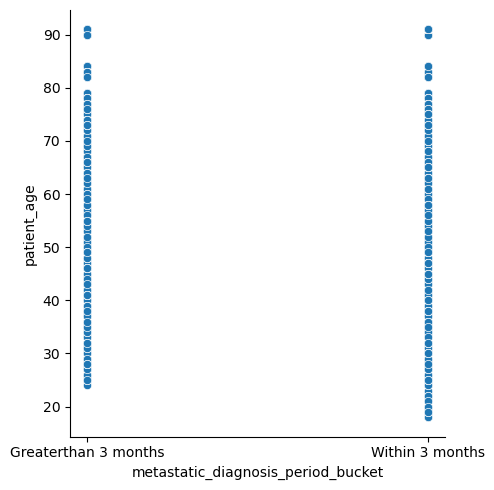

In [66]:
sn.relplot(x='metastatic_diagnosis_period_bucket', y=column_list[7], data=data, kind='scatter')
plt.xlabel('metastatic_diagnosis_period_bucket')
plt.ylabel(column_list[7])
plt.show()

In [67]:
#equal distribution of all ages for both classes

In [68]:
column_list[8]

'patient_gender'

In [69]:
#cat_columns.append(column_list[8])

In [70]:
data[column_list[8]].isna().sum()

0

In [71]:
data[column_list[8]].unique()

array(['F'], dtype=object)

In [72]:
data[column_list[8]].value_counts()

patient_gender
F    13173
Name: count, dtype: int64

In [73]:
#Dropping as same value

In [74]:
column_list[9]

'bmi'

In [75]:
#cat_columns.append(column_list[9])

In [76]:
data[column_list[9]].isna().sum()

9071

In [77]:
data[column_list[9]].unique()

array([  nan, 35.36, 33.1 , ..., 24.38, 29.17, 33.24])

In [78]:
data[column_list[9]].value_counts()

bmi
40.00    109
27.00     93
31.00     77
24.00     75
29.00     66
        ... 
22.95      1
24.01      1
29.64      1
35.59      1
34.45      1
Name: count, Length: 1304, dtype: int64

In [79]:
#Dropping as so many missing values

In [80]:
column_list[10]

'breast_cancer_diagnosis_code'

In [81]:
#cat_columns.append(column_list[10])

In [82]:
data[column_list[10]].isna().sum()

0

In [83]:
data[column_list[10]].unique()

array(['C50912', 'C50412', '1749', 'C50911', '1748', 'C50411', 'C50212',
       'C50811', 'C50919', 'C50211', '1744', 'C50012', 'C50112', 'C50812',
       'C50311', 'C50011', 'C50511', 'C50512', '1741', 'C50819', '1745',
       '1742', 'C50312', '19881', 'C50219', 'C50111', 'C50611', '1743',
       'C50612', 'C5091', 'C5011', 'C50519', 'C50421', 'C50319', 'C50419',
       'C5041', 'C5081', '1746', 'C5031', 'C50922', 'C50119', 'C5001',
       'C50221', 'C509', 'C50019', 'C50122', 'C50619'], dtype=object)

In [84]:
data[column_list[10]].value_counts()

breast_cancer_diagnosis_code
1749      1947
C50912    1834
C50911    1803
C50919    1504
C50411     927
C50412     907
C50812     524
C50811     479
1744       402
1748       337
C50212     292
C50211     249
C50512     225
C50511     220
C50112     207
C50111     197
C50311     160
C50312     139
1742       110
C50012     104
C50011      90
1741        86
1745        81
C50819      53
1743        45
C50419      45
C50611      37
C50612      34
C5091       31
19881       12
C50219      12
C50119      12
C50019      11
C50319      10
1746         9
C5081        8
C50519       8
C5041        5
C509         4
C5031        4
C5011        3
C50421       1
C50922       1
C50221       1
C5001        1
C50122       1
C50619       1
Name: count, dtype: int64

In [85]:
#dropping as the corresponding colun will be added

In [86]:
column_list[11]

'breast_cancer_diagnosis_desc'

In [87]:
cat_columns.append(column_list[11])

In [88]:
data[column_list[11]].isna().sum()

0

In [89]:
data[column_list[11]].unique()

array(['Malignant neoplasm of unspecified site of left female breast',
       'Malig neoplasm of upper-outer quadrant of left female breast',
       'Malignant neoplasm of breast (female), unspecified',
       'Malignant neoplasm of unsp site of right female breast',
       'Malignant neoplasm of other specified sites of female breast',
       'Malig neoplm of upper-outer quadrant of right female breast',
       'Malig neoplasm of upper-inner quadrant of left female breast',
       'Malignant neoplasm of ovrlp sites of right female breast',
       'Malignant neoplasm of unsp site of unspecified female breast',
       'Malig neoplm of upper-inner quadrant of right female breast',
       'Malignant neoplasm of upper-outer quadrant of female breast',
       'Malignant neoplasm of nipple and areola, left female breast',
       'Malignant neoplasm of central portion of left female breast',
       'Malignant neoplasm of ovrlp sites of left female breast',
       'Malig neoplm of lower-inner 

In [90]:
data[column_list[11]].value_counts()

breast_cancer_diagnosis_desc
Malignant neoplasm of breast (female), unspecified              1947
Malignant neoplasm of unspecified site of left female breast    1834
Malignant neoplasm of unsp site of right female breast          1803
Malignant neoplasm of unsp site of unspecified female breast    1504
Malig neoplm of upper-outer quadrant of right female breast      927
Malig neoplasm of upper-outer quadrant of left female breast     907
Malignant neoplasm of ovrlp sites of left female breast          524
Malignant neoplasm of ovrlp sites of right female breast         479
Malignant neoplasm of upper-outer quadrant of female breast      402
Malignant neoplasm of other specified sites of female breast     337
Malig neoplasm of upper-inner quadrant of left female breast     292
Malig neoplm of upper-inner quadrant of right female breast      249
Malig neoplasm of lower-outer quadrant of left female breast     225
Malig neoplm of lower-outer quadrant of right female breast      220
Malig

In [91]:
pd.crosstab(index=data[column_list[11]], columns=data['metastatic_diagnosis_period_bucket'])

metastatic_diagnosis_period_bucket                  Greaterthan 3 months  \
breast_cancer_diagnosis_desc                                               
Malig neoplasm of lower-inner quadrant of left ...                    28   
Malig neoplasm of lower-inner quadrant of unsp ...                     3   
Malig neoplasm of lower-outer quadrant of left ...                    40   
Malig neoplasm of lower-outer quadrant of unsp ...                     2   
Malig neoplasm of upper-inner quadrant of left ...                    63   
Malig neoplasm of upper-inner quadrant of right...                     1   
Malig neoplasm of upper-inner quadrant of unsp ...                     6   
Malig neoplasm of upper-outer quadrant of left ...                   185   
Malig neoplasm of upper-outer quadrant of right...                     0   
Malig neoplasm of upper-outer quadrant of unsp ...                    12   
Malig neoplm of lower-inner quadrant of right f...                    22   
Malig neoplm of lower-outer quadrant of right f...                    54   
Malig neoplm of upper-inner quadrant of right f...                    60   
Malig neoplm of upper-outer quadrant of right f...                   177   
Malignant neoplasm of axillary tail of female b...                     9   
Malignant neoplasm of axillary tail of left fem...                    12   
Malignant neoplasm of axillary tail of right fe...                     9   
Malignant neoplasm of axillary tail of unsp fem...                     0   
Malignant neoplasm of breast (female), unspecified                  1755   
Malignant neoplasm of breast of unspecified site                       3   
Malignant neoplasm of breast of unspecified sit...                    10   
Malignant neoplasm of central portion of breast...                     0   
Malignant neoplasm of central portion of female...                    76   
Malignant neoplasm of central portion of left f...                    38   
Malignant neoplasm of central portion of left m...                     1   
Malignant neoplasm of central portion of right ...                    49   
Malignant neoplasm of central portion of unsp f...                     2   
Malignant neoplasm of lower-inner quadrant of b...                     1   
Malignant neoplasm of lower-inner quadrant of f...                    41   
Malignant neoplasm of lower-outer quadrant of f...                    74   
Malignant neoplasm of nipple and areola, female                        0   
Malignant neoplasm of nipple and areola, left f...                    30   
Malignant neoplasm of nipple and areola, right ...                    18   
Malignant neoplasm of nipple and areola, unsp f...                     5   
Malignant neoplasm of other specified sites of ...                   301   
Malignant neoplasm of overlapping sites of brea...                     1   
Malignant neoplasm of ovrlp sites of left femal...                   103   
Malignant neoplasm of ovrlp sites of right fema...                    99   
Malignant neoplasm of ovrlp sites of unsp femal...                    13   
Malignant neoplasm of unsp site of right female...                   392   
Malignant neoplasm of unsp site of unspecified ...                   333   
Malignant neoplasm of unspecified site of left ...                   405   
Malignant neoplasm of unspecified site of left ...                     0   
Malignant neoplasm of upper-inner quadrant of f...                    97   
Malignant neoplasm of upper-outer quadrant of b...                     1   
Malignant neoplasm of upper-outer quadrant of f...                   365   
Secondary malignant neoplasm of breast                                 9   

metastatic_diagnosis_period_bucket                  Within 3 months  
breast_cancer_diagnosis_desc                                         
Malig neoplasm of lower-inner quadrant of left ...              111  
Malig neoplasm of lower-inner quadrant of unsp ...               

In [92]:
#Malig neoplasm of lower-inner quadrant of right female breast: 86.3%

In [93]:
column_list[12]

'metastatic_cancer_diagnosis_code'

In [94]:
cat_columns.append(column_list[12])

In [95]:
data[column_list[12]].isna().sum()

0

In [96]:
data[column_list[12]].unique()

array(['C773', 'C7951', 'C786', 'C799', 'C792', 'C7989', 'C7981', 'C7801',
       'C7800', 'C787', 'C779', 'C7931', 'C782', 'C785', 'C7982', 'C771',
       'C775', 'C7802', 'C770', 'C772', 'C7889', 'C781', 'C778', 'C784',
       'C7960', 'C7949', 'C7911', 'C7952', 'C7970', 'C7932', 'C774',
       'C7940', 'C7971', 'C7910', 'C7901', 'C7962', 'C7880', 'C7961',
       'C7839', 'C7972', 'C795', 'C798', 'C7900'], dtype=object)

In [97]:
data[column_list[12]].value_counts()

metastatic_cancer_diagnosis_code
C773     7308
C7951    1922
C779      700
C7981     453
C7800     422
C787      372
C7989     330
C7931     277
C799      259
C792      187
C7801     171
C771      145
C770      140
C782       78
C7802      75
C778       73
C786       35
C7952      30
C772       29
C781       26
C7949      24
C7889      21
C7960      19
C785       11
C7982       8
C7932       8
C775        6
C7961       6
C784        6
C7971       5
C7970       5
C7972       3
C774        3
C7940       3
C7911       2
C795        2
C7901       2
C798        2
C7910       1
C7839       1
C7880       1
C7962       1
C7900       1
Name: count, dtype: int64

In [98]:
len(data[column_list[12]].value_counts())

43

In [99]:
pd.crosstab(index=data[column_list[12]], columns=data['metastatic_diagnosis_period_bucket'])

metastatic_diagnosis_period_bucket  Greaterthan 3 months  Within 3 months
metastatic_cancer_diagnosis_code                                         
C770                                                  62               78
C771                                                  55               90
C772                                                   7               22
C773                                                2495             4813
C774                                                   2                1
C775                                                   1                5
C778                                                  27               46
C779                                                 338              362
C7800                                                135              287
C7801                                                 56              115
C7802                                                 29               46
C781                                                  11               15
C782                                                  30               48
C7839                                                  0                1
C784                                                   4                2
C785                                                   3                8
C786                                                   7               28
C787                                                 137              235
C7880                                                  0                1
C7889                                                  6               15
C7900                                                  0                1
C7901                                                  1                1
C7910                                                  0                1
C7911                                                  1                1
C792                                                  82              105
C7931                                                110              167
C7932                                                  5                3
C7940                                                  1                2
C7949                                                 10               14
C795                                                   1                1
C7951                                                807             1115
C7952                                                 11               19
C7960                                                  5               14
C7961                                                  1                5
C7962                                                  1                0
C7970                                                  2                3
C7971                                                  1                4
C7972                                                  0                3
C798                                                   1                1
C7981                                                224              229
C7982                                                  3                5
C7989                                                131              199
C799                                                 102              157

In [100]:
column_list[13]

'metastatic_first_novel_treatment'

In [101]:
#cat_columns.append(column_list[13])

In [102]:
data[column_list[13]].isna().sum()

13162

In [103]:
#dropping as so many missing values

In [104]:
column_list[14]

'metastatic_first_novel_treatment_type'

In [105]:
#cat_columns.append(column_list[14])

In [106]:
data[column_list[14]].isna().sum()

13162

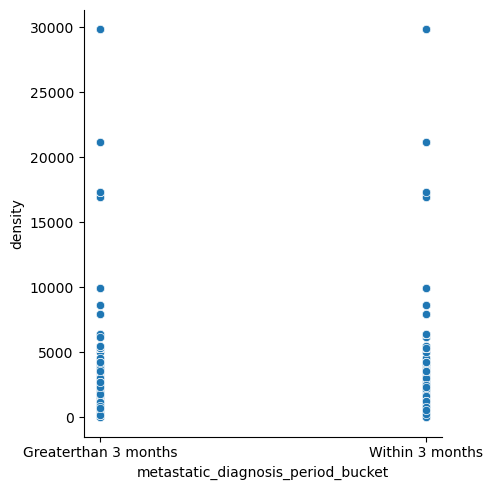

In [107]:
sn.relplot(x='metastatic_diagnosis_period_bucket', y=column_list[16], data=data, kind='scatter')

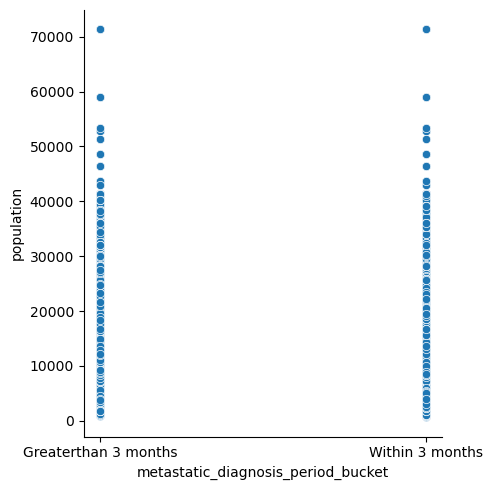

In [108]:
sn.relplot(x='metastatic_diagnosis_period_bucket', y=column_list[15], data=data, kind='scatter')


In [109]:
#dropping as so many missing values

In [110]:
for i in column_list[15:-1]:
    cont_columns.append(i)
    data[i]=data[i].fillna("Not Available")

In [111]:
cat_columns

['patient_race',
 'payer_type',
 'patient_state',
 'Region',
 'Division',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code']

In [112]:
cont_columns

['patient_age',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_force_pa

In [113]:
final_list_columns=cat_columns+cont_columns+['target']

In [114]:
new_data=pd.DataFrame(data,columns=final_list_columns)

In [115]:
new_data

patient_race                payer_type patient_state     Region  \
0      Race Not Available                COMMERCIAL            AR      South   
1                   White  Payer Type Not Available            IL    Midwest   
2      Race Not Available                COMMERCIAL            CA       West   
3                Hispanic                  MEDICAID            CA       West   
4      Race Not Available                COMMERCIAL            CA       West   
...                   ...                       ...           ...        ...   
13168            Hispanic                  MEDICAID            PA  Northeast   
13169  Race Not Available                COMMERCIAL            TX      South   
13170  Race Not Available                COMMERCIAL            CA       West   
13171  Race Not Available                COMMERCIAL            MI    Midwest   
13172            Hispanic                  MEDICAID            CA       West   

                 Division                       breast_cancer_diagnosis_desc  \
0      West South Central  Malignant neoplasm of unspecified site of left...   
1      East North Central  Malig neoplasm of upper-outer quadrant of left...   
2                 Pacific  Malignant neoplasm of breast (female), unspeci...   
3                 Pacific  Malignant neoplasm of unsp site of right femal...   
4                 Pacific  Malignant neoplasm of other specified sites of...   
...                   ...                                                ...   
13168     Middle Atlantic  Malignant neoplasm of unsp site of right femal...   
13169  West South Central  Malignant neoplasm of breast (female), unspeci...   
13170             Pacific  Malignant neoplasm of ovrlp sites of unsp fema...   
13171  East North Central  Malignant neoplasm of upper-inner quadrant of ...   
13172             Pacific  Malignant neoplasm of unsp site of right femal...   

      metastatic_cancer_diagnosis_code  patient_age  population  density  ...  \
0                                 C773           39     3924.87    82.63  ...   
1                                 C773           55     2745.39    51.79  ...   
2                                 C773           59    38343.18   700.34  ...   
3                                 C773           59    36054.12  5294.33  ...   
4                                C7951           71    13700.37   400.48  ...   
...                                ...          ...         ...      ...  ...   
13168                             C773           59    31948.46  5512.17  ...   
13169                            C7951           73     9309.38   204.69  ...   
13170                             C799           19    39121.88  2295.94  ...   
13171                             C779           52    23266.06   743.56  ...   
13172                             C787           63    36054.12  5294.33  ...   

       Average of Apr-18  Average of May-18  Average of Jun-18  \
0                  52.55              74.77              79.96   
1                  49.30              72.87               77.4   
2                  68.50              70.31              78.61   
3                  63.34              63.10              67.45   
4                  59.45              60.24              64.77   
...                  ...                ...                ...   
13168              48.81              66.12              70.38   
13169              62.03              77.82              84.52   
13170              66.20              66.04              70.87   
13171              39.93              63.56              68.68   
13172              63.34              63.10              67.45   

       Average of Jul-18  Average of Aug-18  Average of Sep-18  \
0                  81.69               78.3              74.56   
1                  77.43              75.83              72.64   
2                  87.24              85.52              80.75   
3                  75.86              75.24               71.

In [116]:
filterd_rows = (new_data != 'Not Available').all(axis=1)

In [117]:
filtered_df=new_data[filterd_rows]

In [118]:
filtered_df=filtered_df.reset_index(drop=True)

In [119]:
filtered_df

patient_race                payer_type patient_state     Region  \
0      Race Not Available                COMMERCIAL            AR      South   
1                   White  Payer Type Not Available            IL    Midwest   
2      Race Not Available                COMMERCIAL            CA       West   
3                Hispanic                  MEDICAID            CA       West   
4      Race Not Available                COMMERCIAL            CA       West   
...                   ...                       ...           ...        ...   
12757            Hispanic                  MEDICAID            PA  Northeast   
12758  Race Not Available                COMMERCIAL            TX      South   
12759  Race Not Available                COMMERCIAL            CA       West   
12760  Race Not Available                COMMERCIAL            MI    Midwest   
12761            Hispanic                  MEDICAID            CA       West   

                 Division                       breast_cancer_diagnosis_desc  \
0      West South Central  Malignant neoplasm of unspecified site of left...   
1      East North Central  Malig neoplasm of upper-outer quadrant of left...   
2                 Pacific  Malignant neoplasm of breast (female), unspeci...   
3                 Pacific  Malignant neoplasm of unsp site of right femal...   
4                 Pacific  Malignant neoplasm of other specified sites of...   
...                   ...                                                ...   
12757     Middle Atlantic  Malignant neoplasm of unsp site of right femal...   
12758  West South Central  Malignant neoplasm of breast (female), unspeci...   
12759             Pacific  Malignant neoplasm of ovrlp sites of unsp fema...   
12760  East North Central  Malignant neoplasm of upper-inner quadrant of ...   
12761             Pacific  Malignant neoplasm of unsp site of right femal...   

      metastatic_cancer_diagnosis_code  patient_age  population  density  ...  \
0                                 C773           39     3924.87    82.63  ...   
1                                 C773           55     2745.39    51.79  ...   
2                                 C773           59    38343.18   700.34  ...   
3                                 C773           59    36054.12  5294.33  ...   
4                                C7951           71    13700.37   400.48  ...   
...                                ...          ...         ...      ...  ...   
12757                             C773           59    31948.46  5512.17  ...   
12758                            C7951           73     9309.38   204.69  ...   
12759                             C799           19    39121.88  2295.94  ...   
12760                             C779           52    23266.06   743.56  ...   
12761                             C787           63    36054.12  5294.33  ...   

       Average of Apr-18  Average of May-18  Average of Jun-18  \
0                  52.55              74.77              79.96   
1                  49.30              72.87               77.4   
2                  68.50              70.31              78.61   
3                  63.34              63.10              67.45   
4                  59.45              60.24              64.77   
...                  ...                ...                ...   
12757              48.81              66.12              70.38   
12758              62.03              77.82              84.52   
12759              66.20              66.04              70.87   
12760              39.93              63.56              68.68   
12761              63.34              63.10              67.45   

       Average of Jul-18  Average of Aug-18  Average of Sep-18  \
0                  81.69               78.3              74.56   
1                  77.43              75.83              72.64   
2                  87.24              85.52              80.75   
3                  75.86              75.24               71.

In [120]:
for i in cont_columns:
    filtered_df[i] = filtered_df[i].astype(float)

In [121]:
#Outlier removal

In [122]:
not_outliers=filtered_df[(abs(zscore(filtered_df[cont_columns]))<3).all(axis=1)].index

In [123]:
len(filtered_df)-len(not_outliers)

3579

In [124]:
#3579 outliers

In [125]:
#removing outliers

In [126]:
data_final=filtered_df.iloc[not_outliers]

In [127]:
data_final=data_final.reset_index(drop=True)

In [128]:
data_final

patient_race                payer_type patient_state     Region  \
0     Race Not Available                COMMERCIAL            AR      South   
1                  White  Payer Type Not Available            IL    Midwest   
2     Race Not Available                COMMERCIAL            CA       West   
3               Hispanic                  MEDICAID            CA       West   
4     Race Not Available                COMMERCIAL            CA       West   
...                  ...                       ...           ...        ...   
9178  Race Not Available                COMMERCIAL            WI    Midwest   
9179            Hispanic                  MEDICAID            PA  Northeast   
9180  Race Not Available                COMMERCIAL            TX      South   
9181  Race Not Available                COMMERCIAL            MI    Midwest   
9182            Hispanic                  MEDICAID            CA       West   

                Division                       breast_cancer_diagnosis_desc  \
0     West South Central  Malignant neoplasm of unspecified site of left...   
1     East North Central  Malig neoplasm of upper-outer quadrant of left...   
2                Pacific  Malignant neoplasm of breast (female), unspeci...   
3                Pacific  Malignant neoplasm of unsp site of right femal...   
4                Pacific  Malignant neoplasm of other specified sites of...   
...                  ...                                                ...   
9178  East North Central  Malignant neoplasm of unsp site of right femal...   
9179     Middle Atlantic  Malignant neoplasm of unsp site of right femal...   
9180  West South Central  Malignant neoplasm of breast (female), unspeci...   
9181  East North Central  Malignant neoplasm of upper-inner quadrant of ...   
9182             Pacific  Malignant neoplasm of unsp site of right femal...   

     metastatic_cancer_diagnosis_code  patient_age  population  density  ...  \
0                                C773         39.0     3924.87    82.63  ...   
1                                C773         55.0     2745.39    51.79  ...   
2                                C773         59.0    38343.18   700.34  ...   
3                                C773         59.0    36054.12  5294.33  ...   
4                               C7951         71.0    13700.37   400.48  ...   
...                               ...          ...         ...      ...  ...   
9178                             C773         36.0     8786.51   164.18  ...   
9179                             C773         59.0    31948.46  5512.17  ...   
9180                            C7951         73.0     9309.38   204.69  ...   
9181                             C779         52.0    23266.06   743.56  ...   
9182                             C787         63.0    36054.12  5294.33  ...   

      Average of Apr-18  Average of May-18  Average of Jun-18  \
0                 52.55              74.77              79.96   
1                 49.30              72.87              77.40   
2                 68.50              70.31              78.61   
3                 63.34              63.10              67.45   
4                 59.45              60.24              64.77   
...                 ...                ...                ...   
9178              35.36              61.32              66.09   
9179              48.81              66.12              70.38   
9180              62.03              77.82              84.52   
9181              39.93              63.56              68.68   
9182              63.34              63.10              67.45   

      Average of Jul-18  Average of Aug-18  Average of Sep-18  \
0                 81.69              78.30              74.56   
1                 77.43              75.83              72.64   
2                 87.24              85.52              80.75   
3                 75.86              75.24              71.10   
4                 69.81              70.13     

In [129]:
#corelation plot

In [130]:
corrMatrix=data_final[cont_columns].corr()

<Axes: >

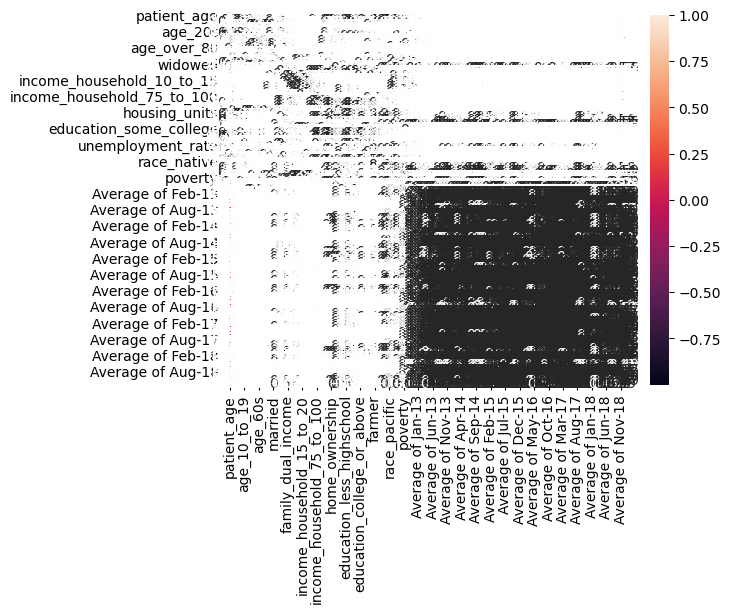

In [131]:
sn.heatmap(corrMatrix,annot=True)

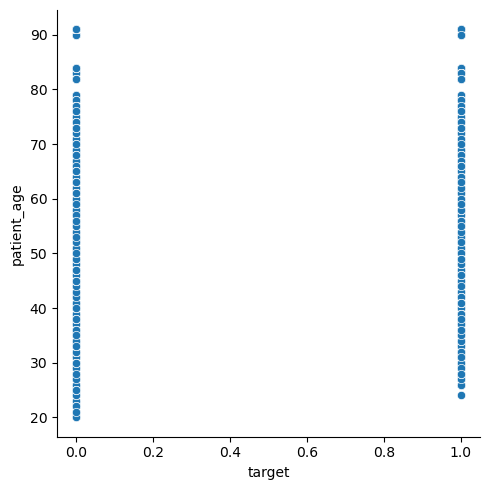

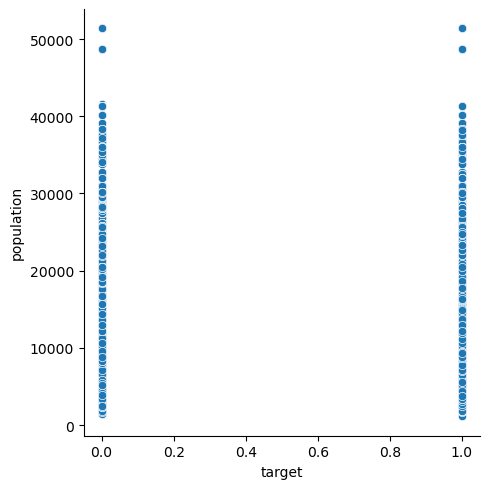

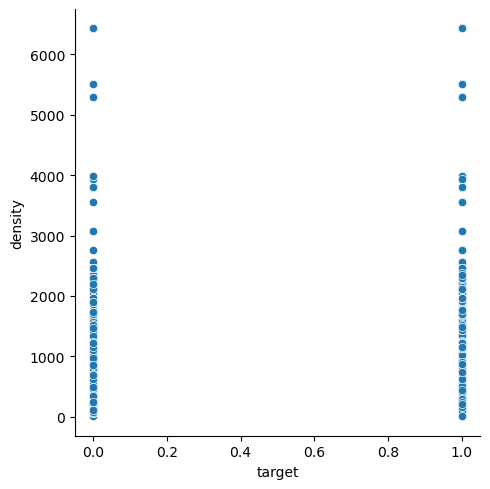

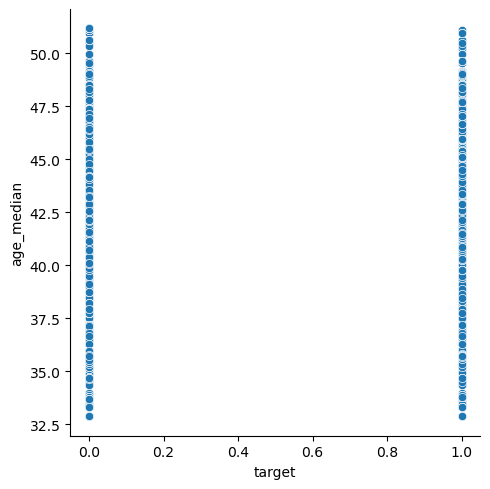

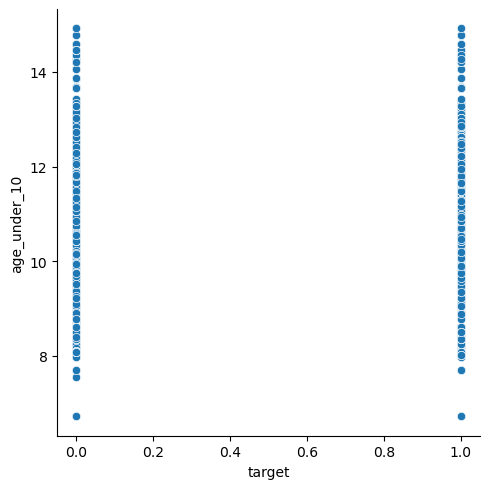

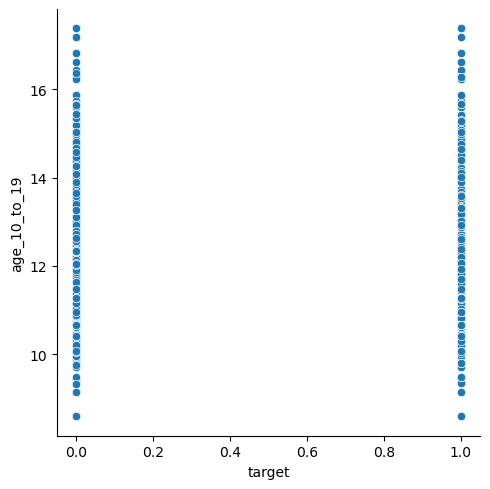

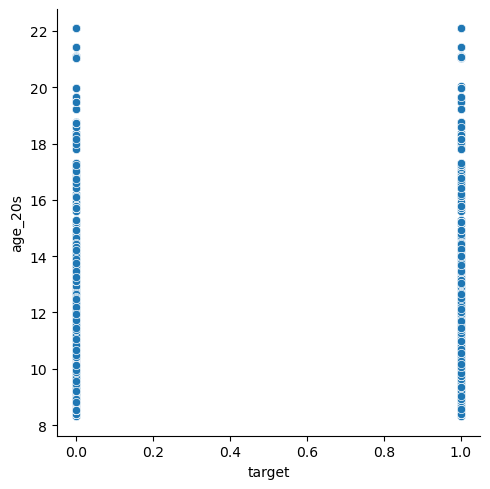

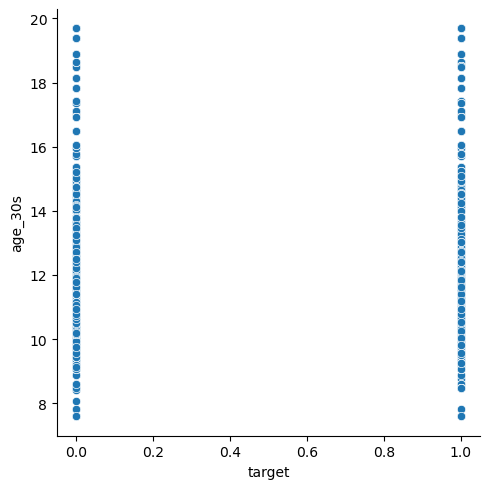

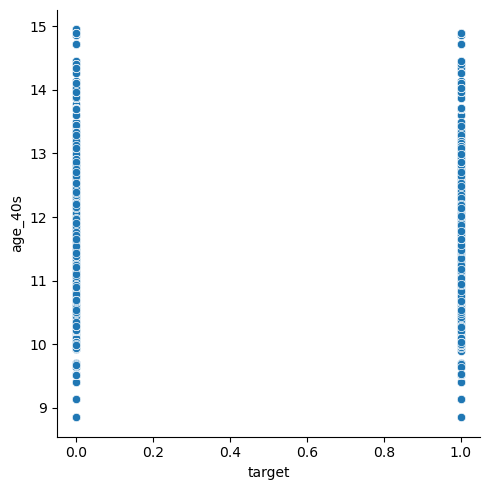

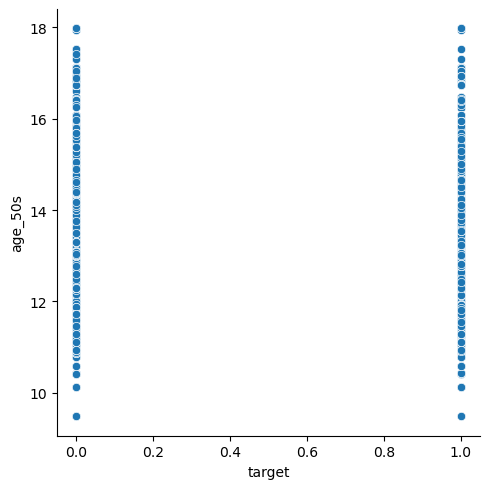

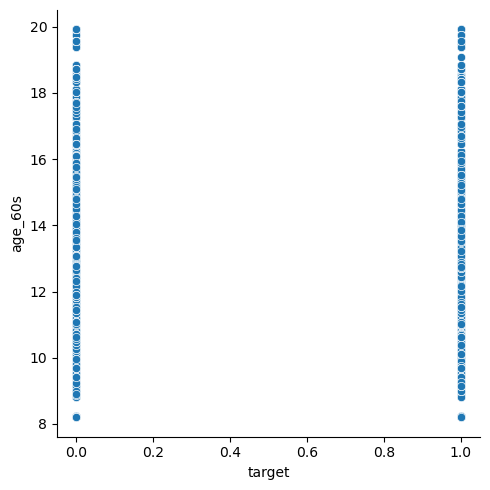

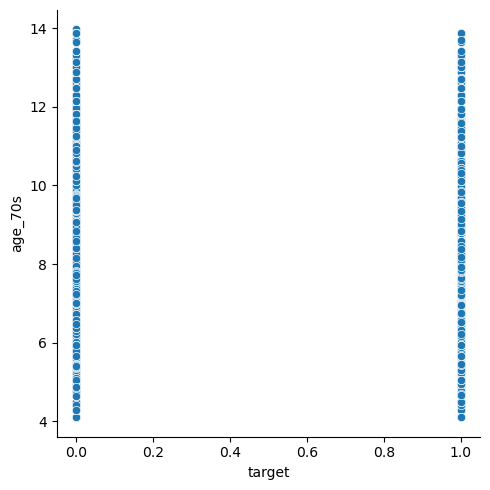

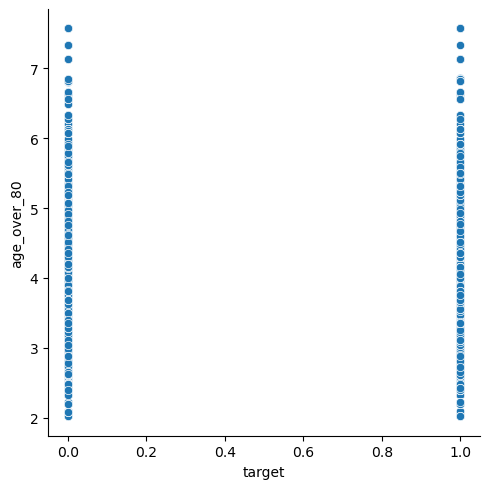

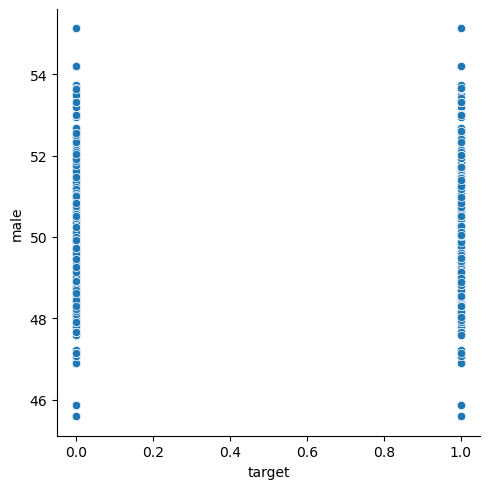

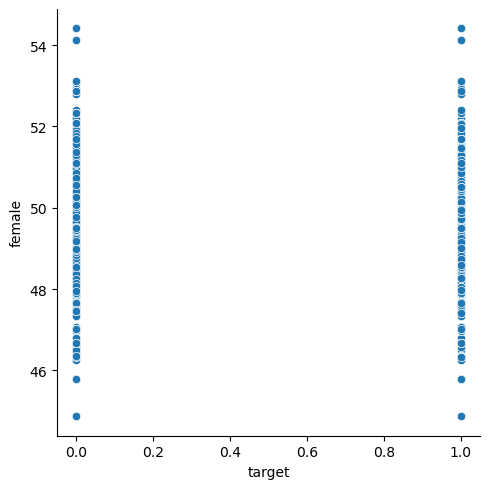

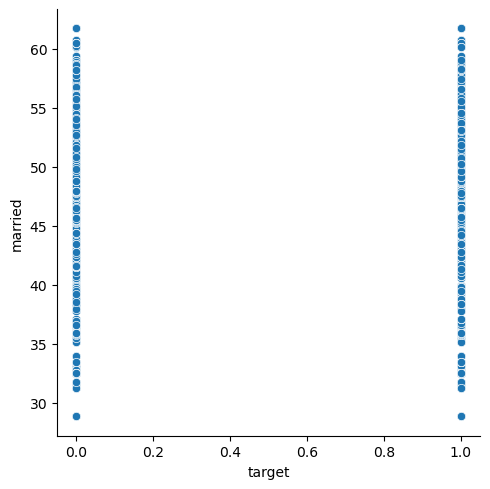

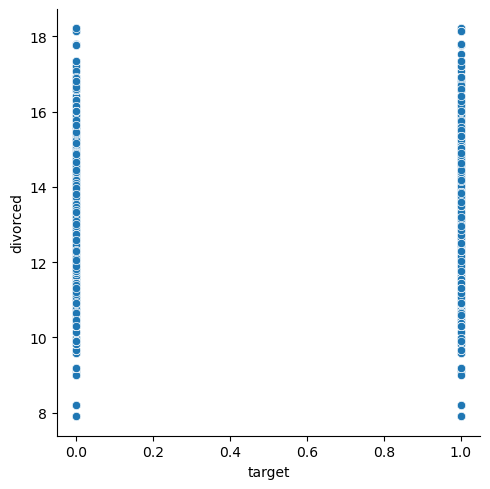

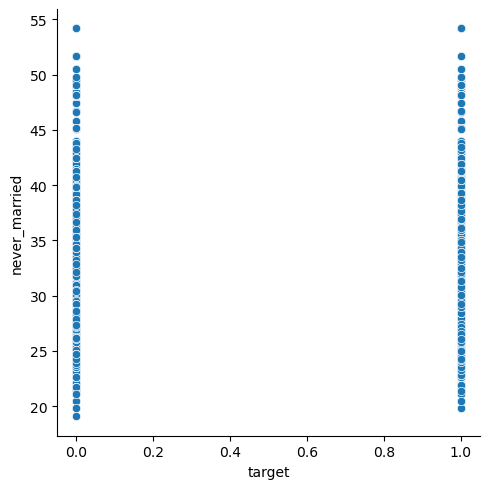

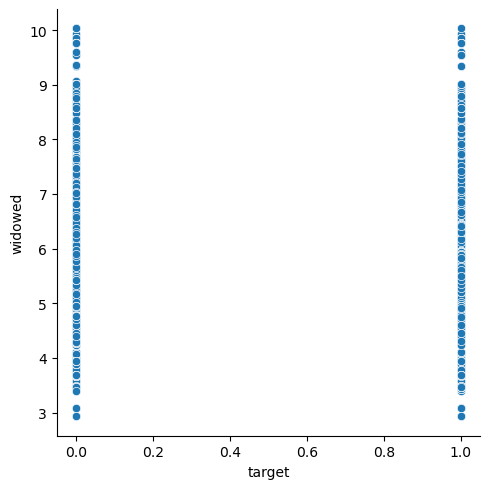

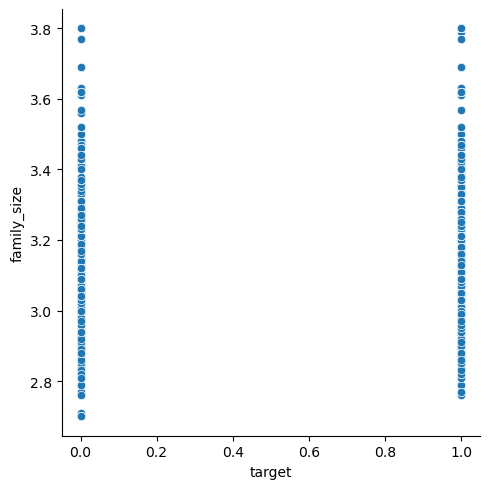

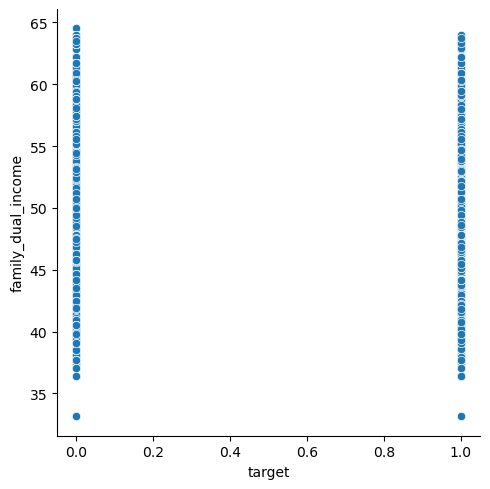

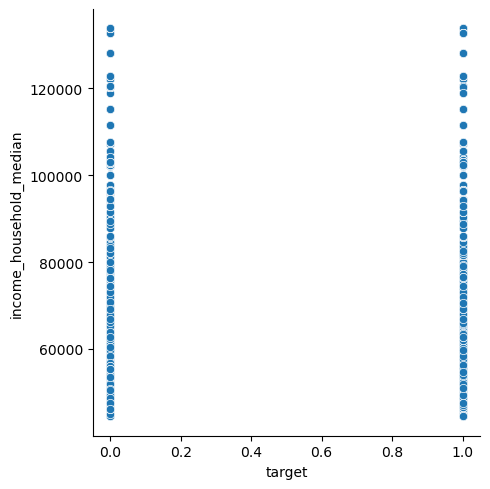

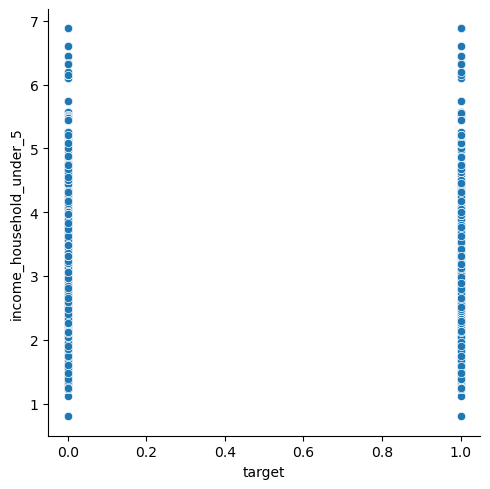

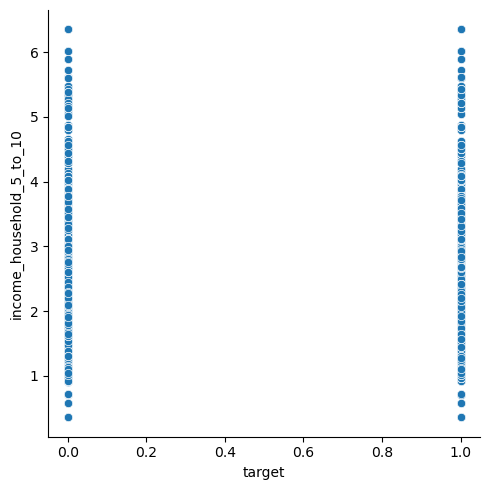

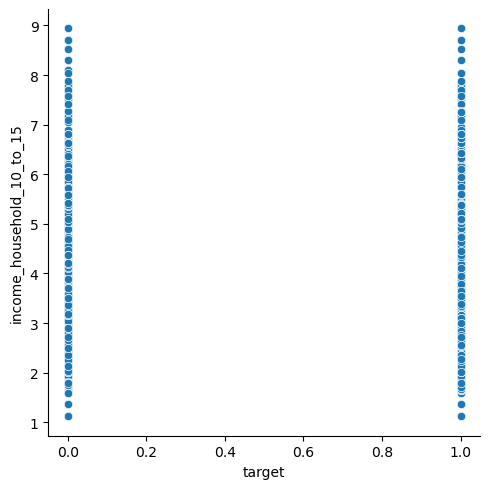

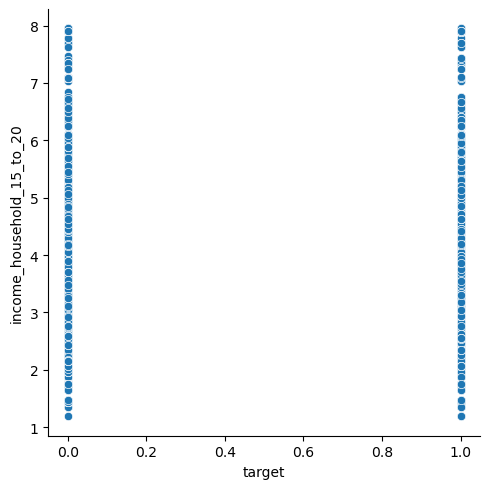

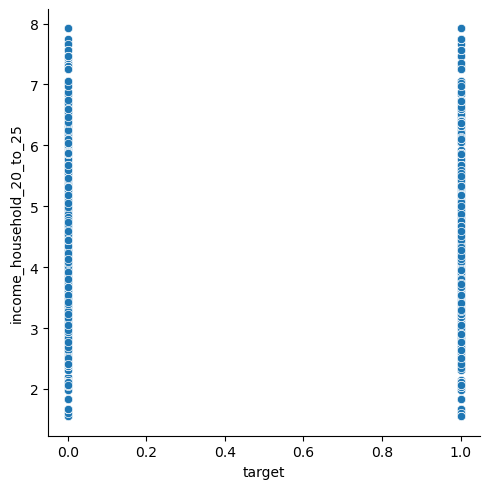

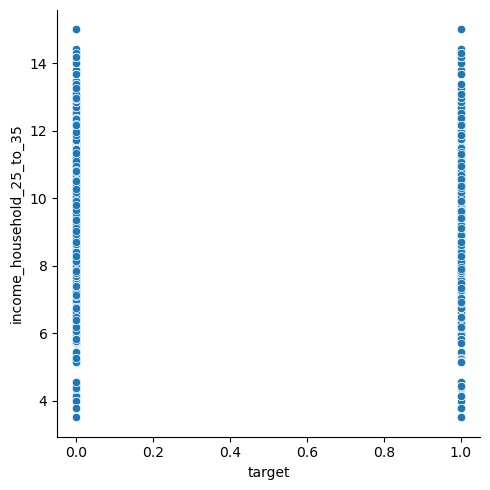

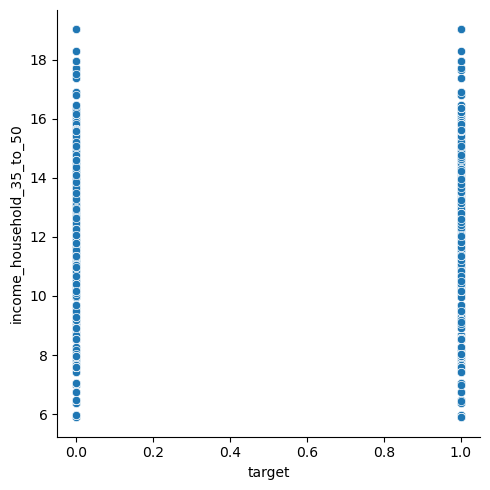

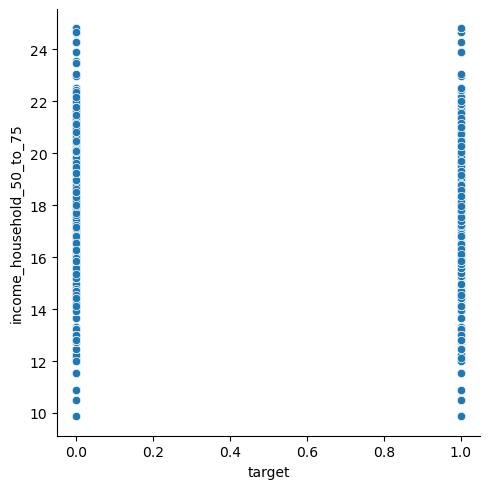

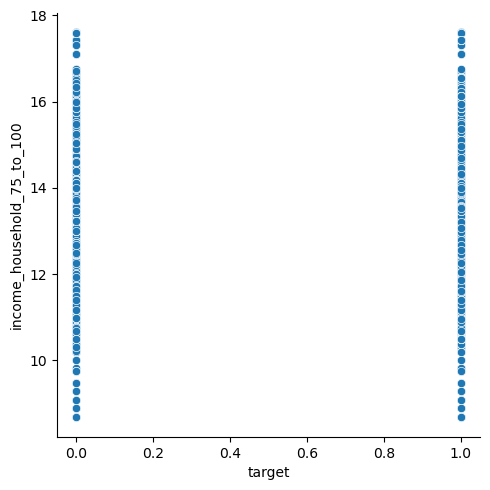

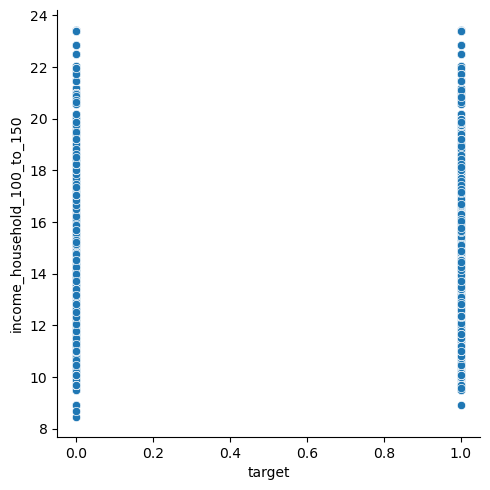

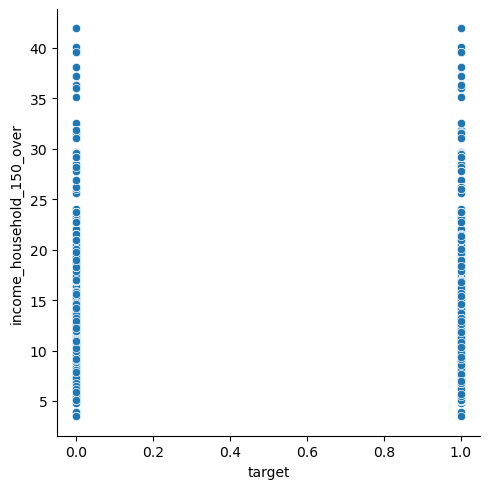

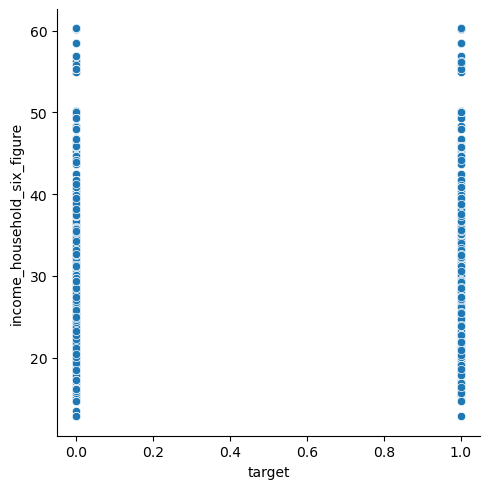

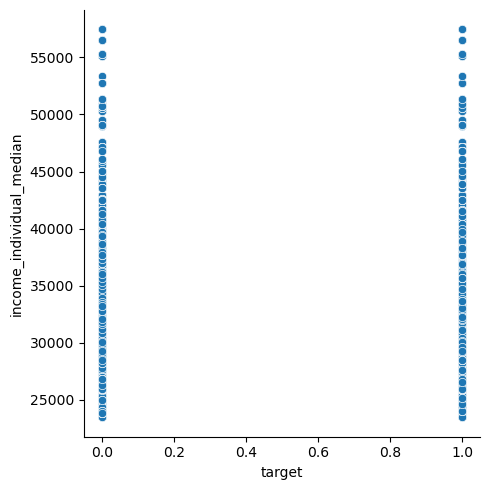

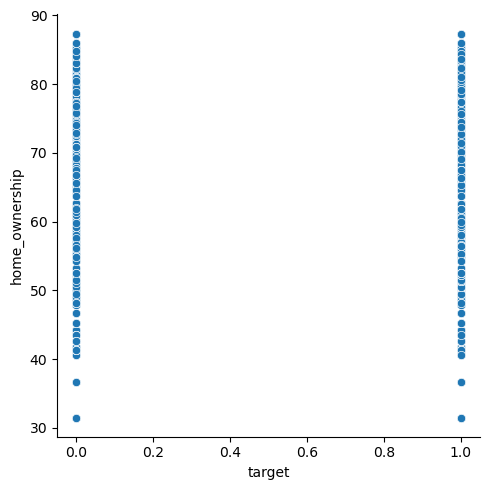

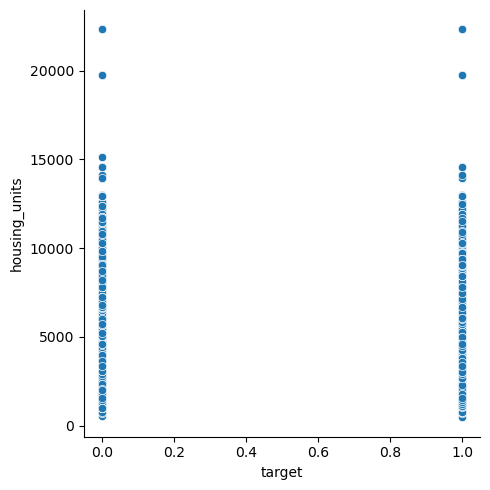

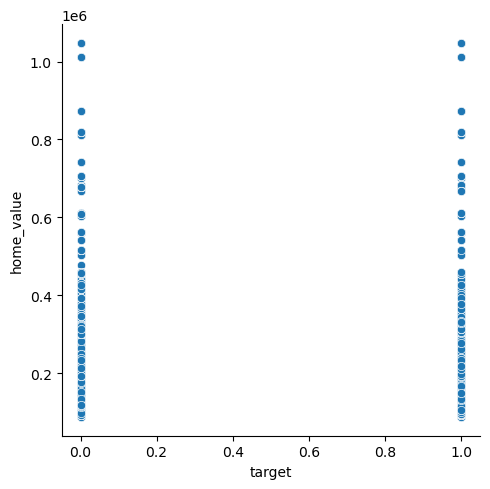

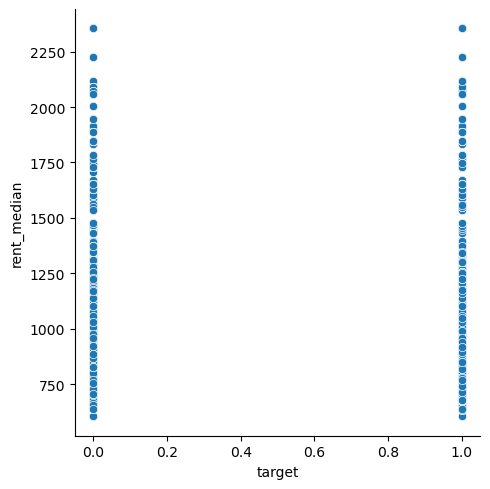

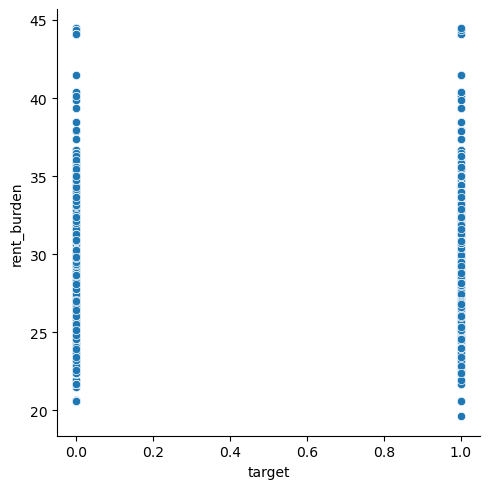

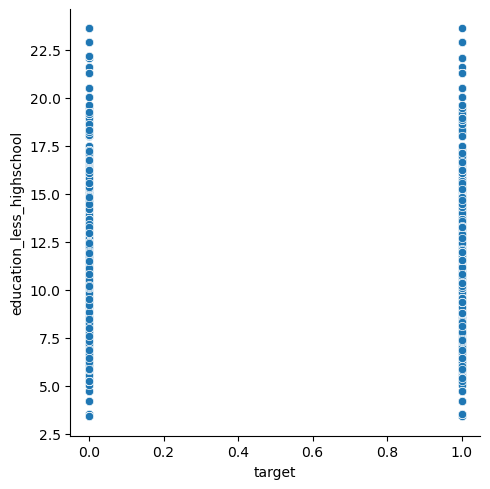

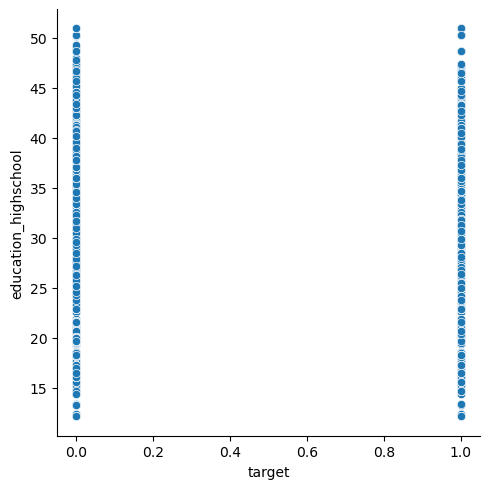

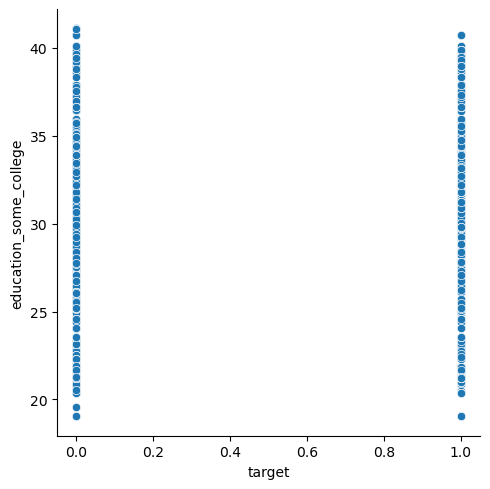

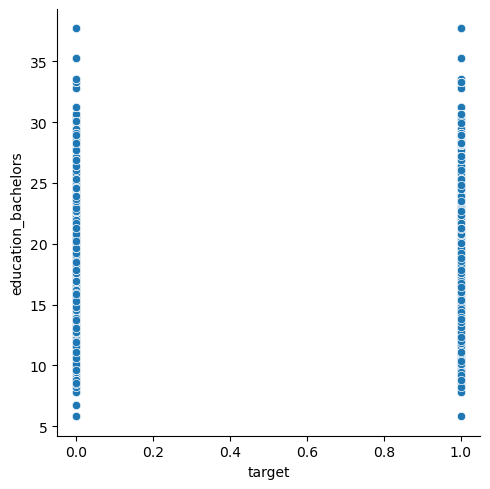

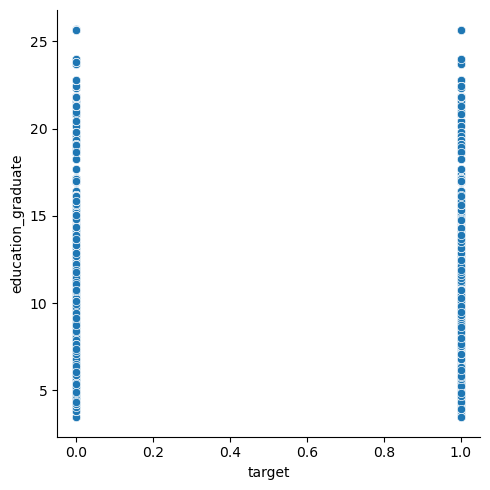

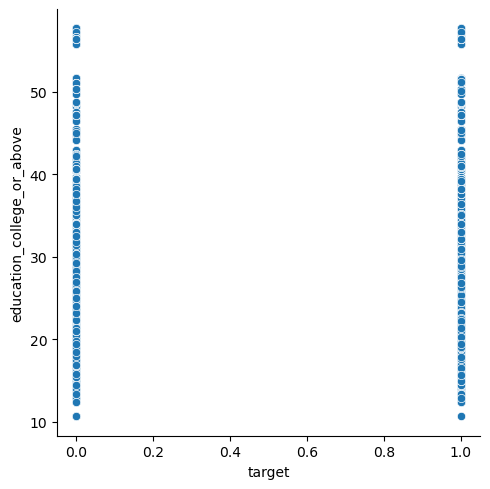

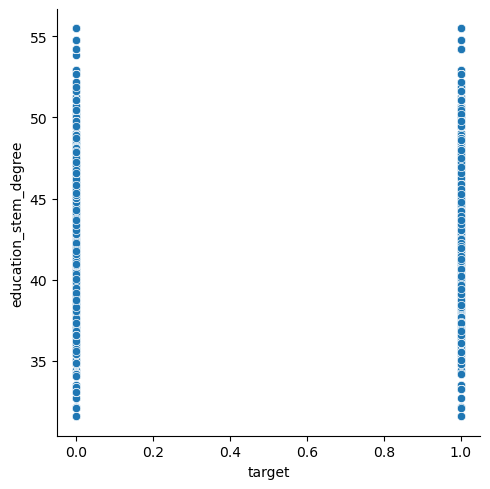

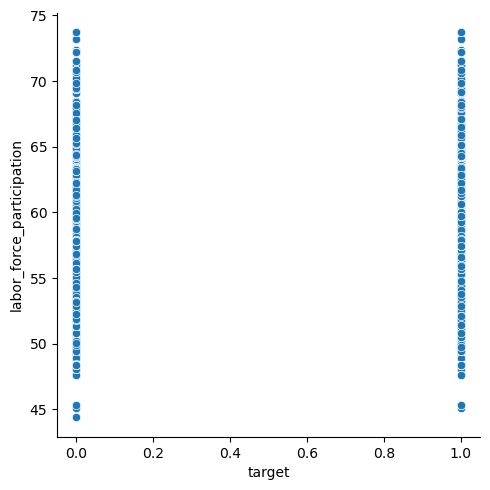

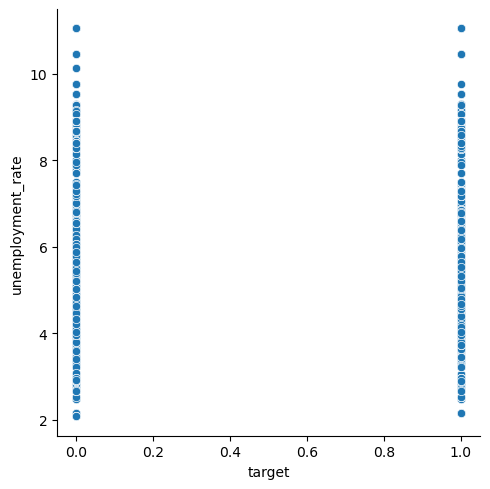

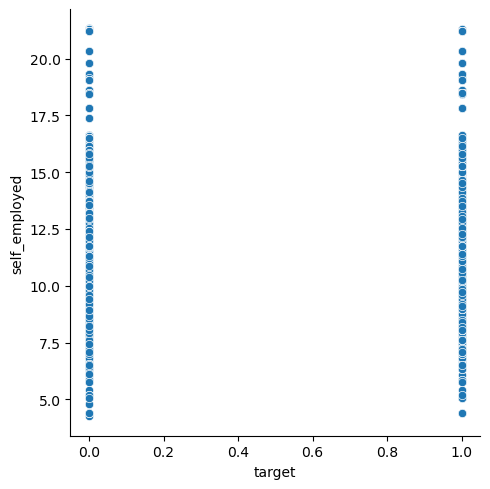

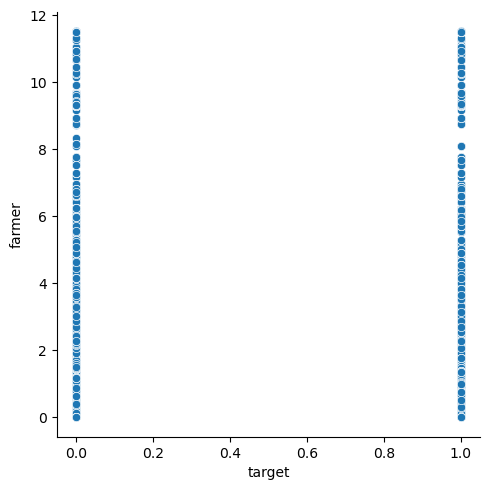

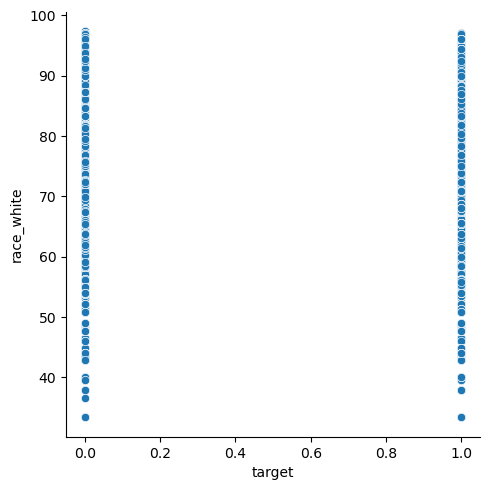

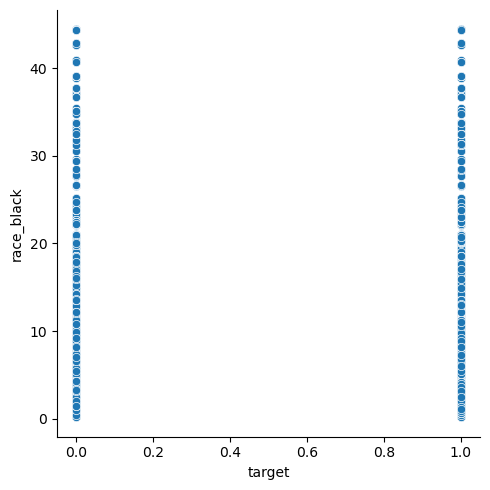

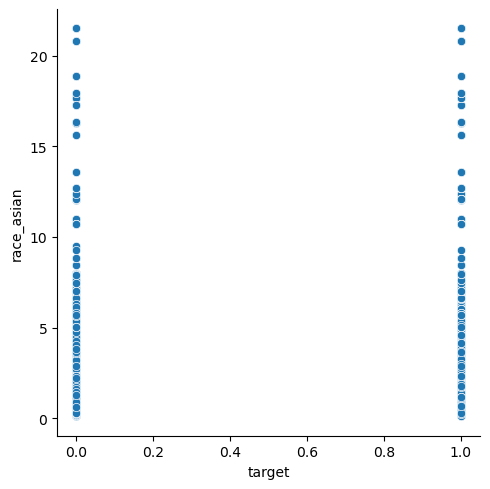

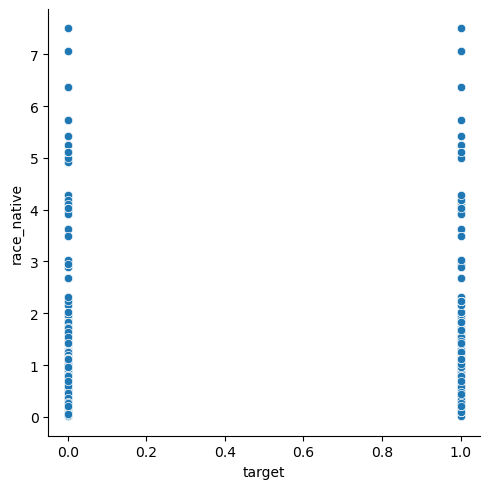

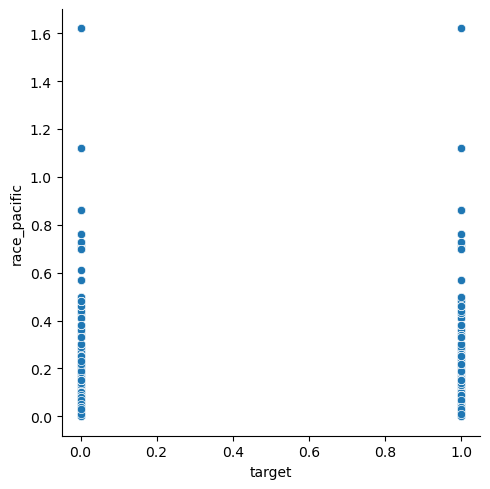

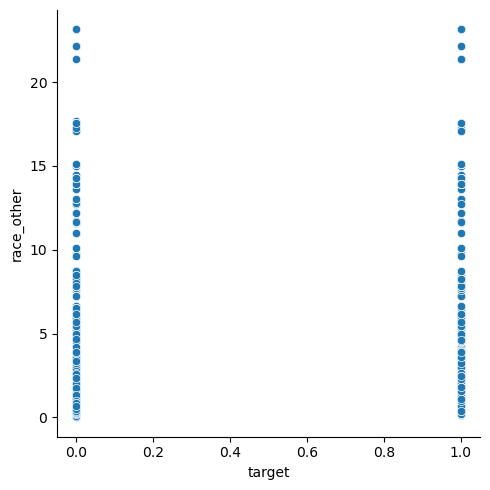

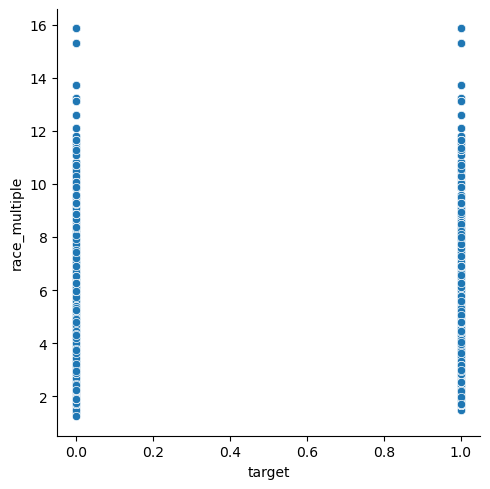

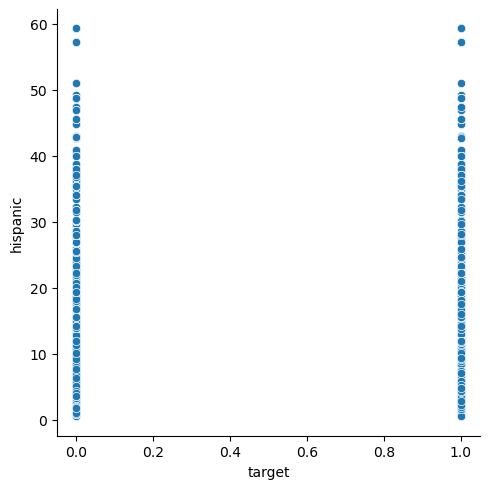

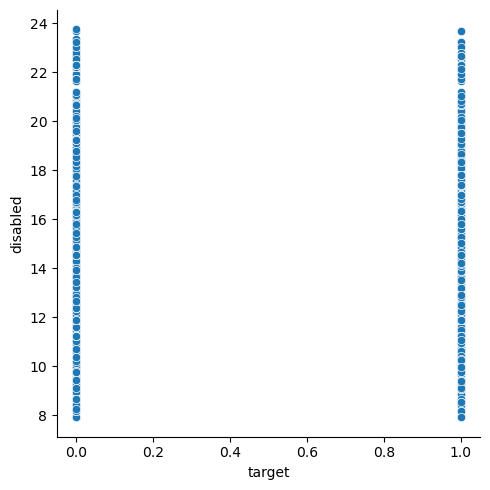

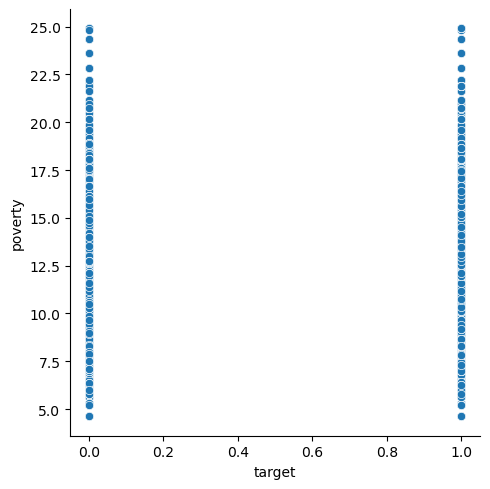

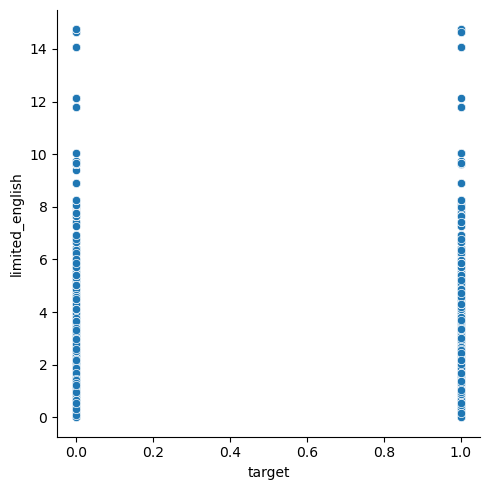

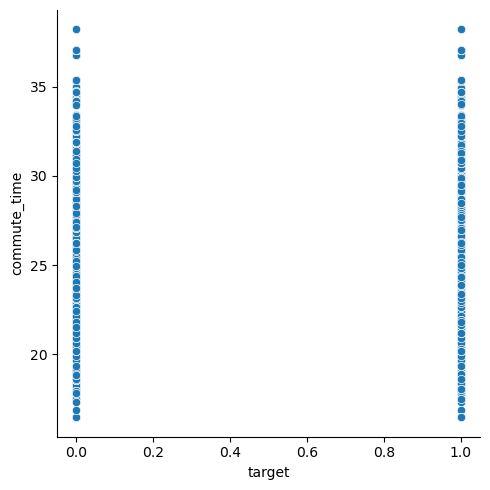

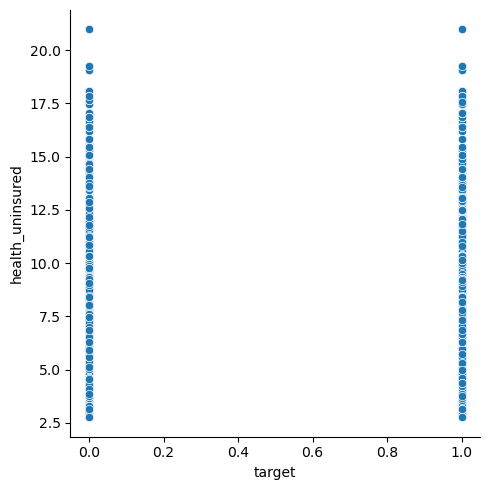

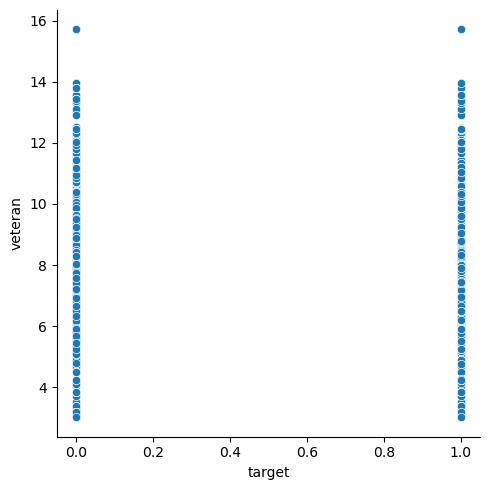

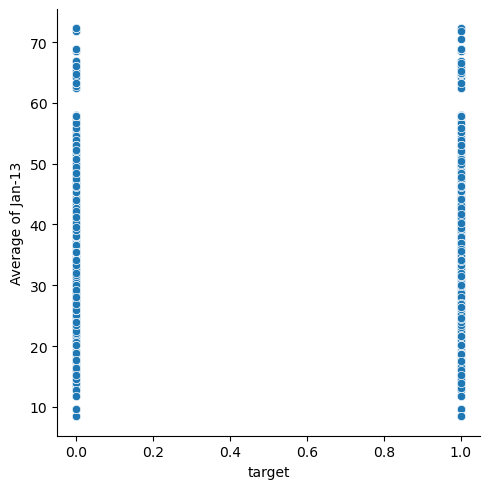

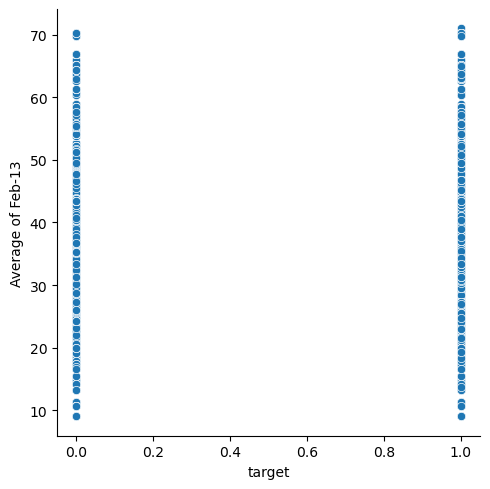

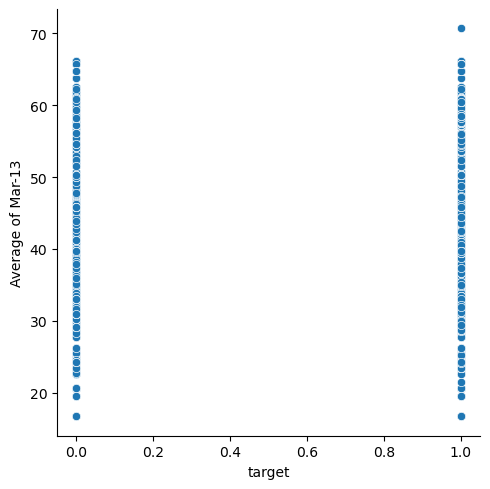

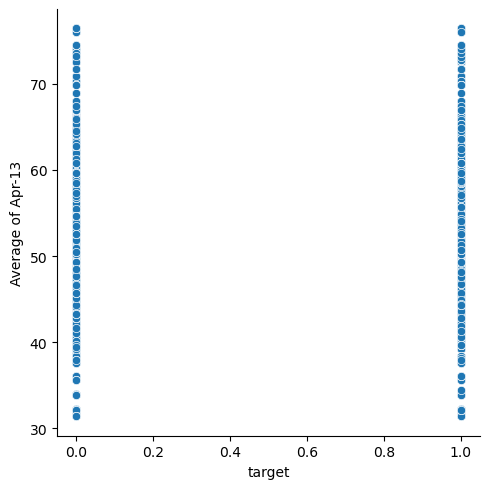

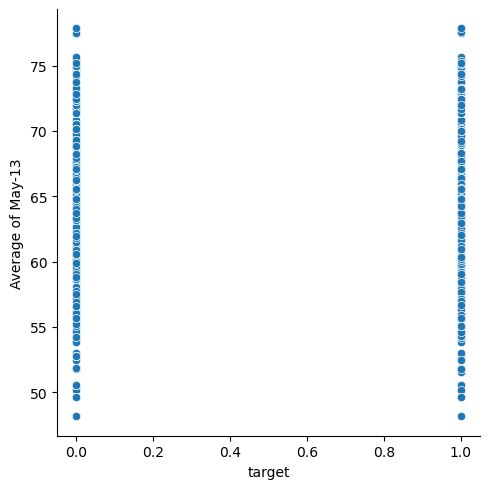

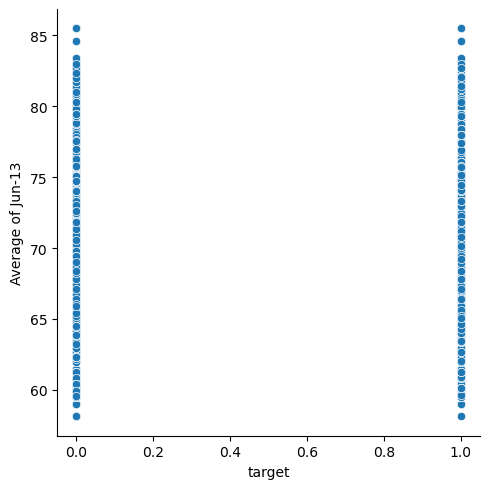

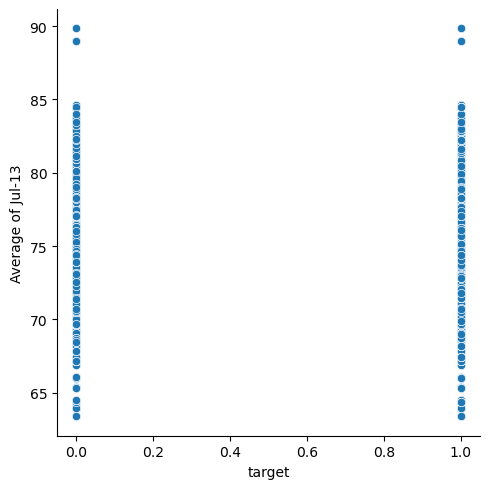

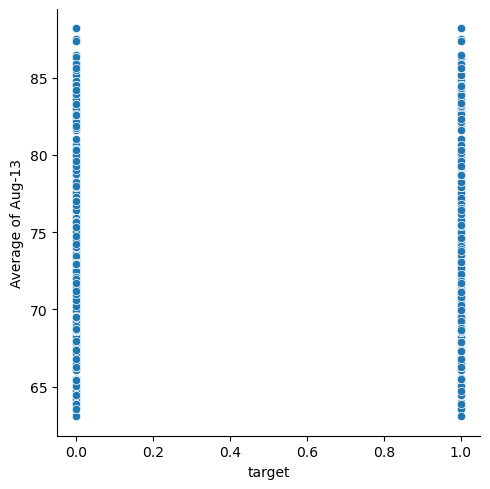

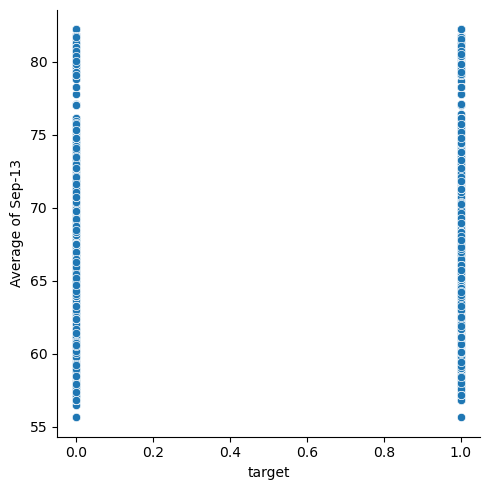

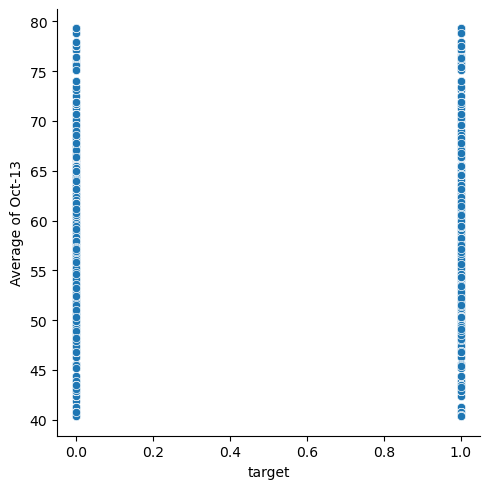

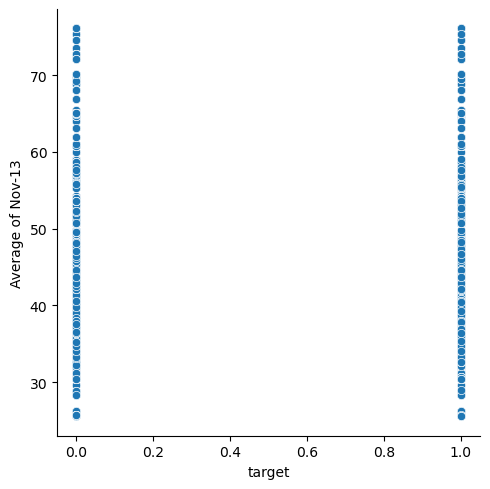

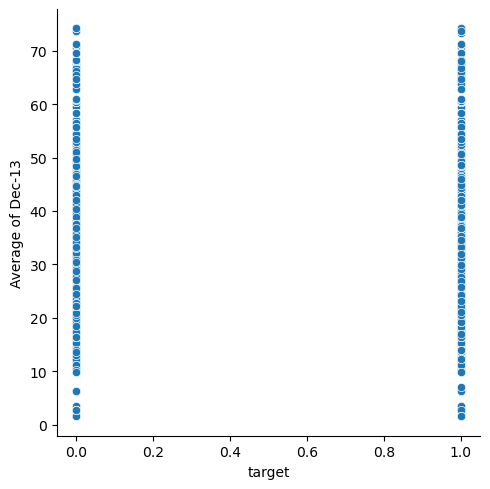

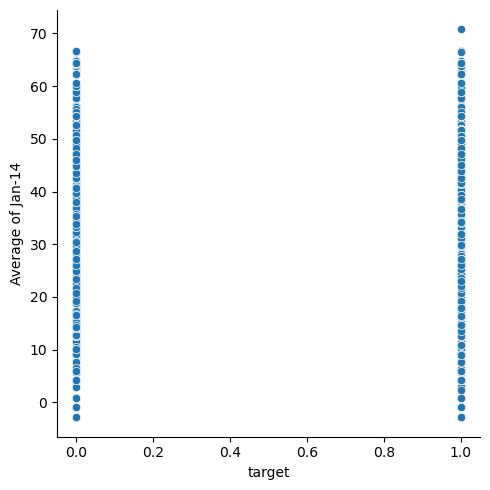

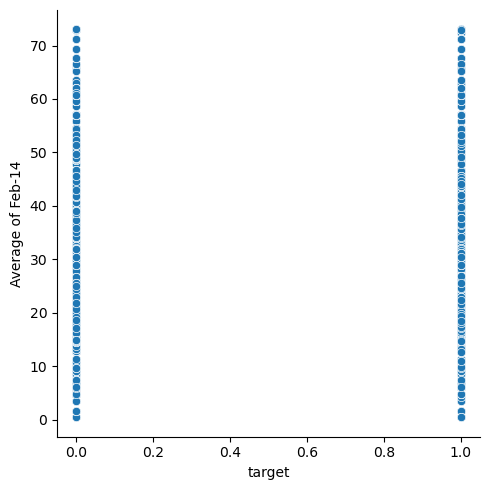

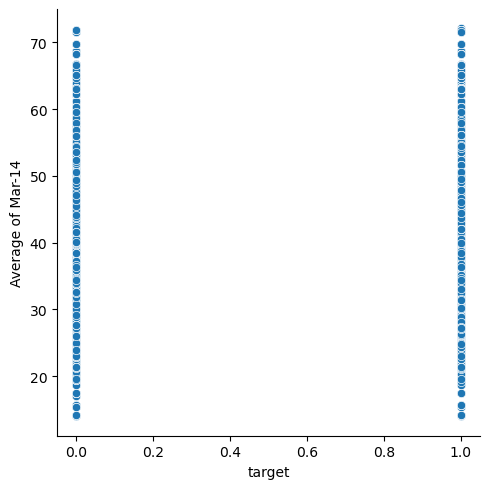

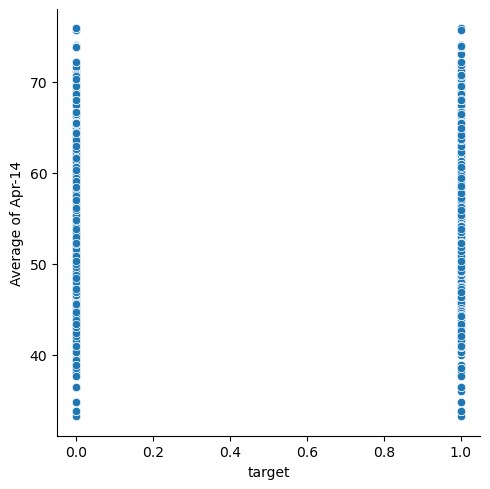

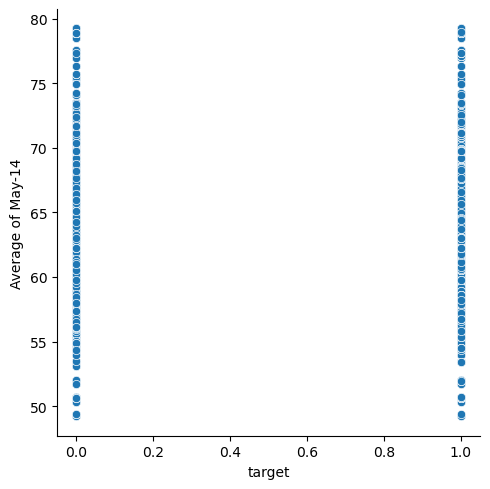

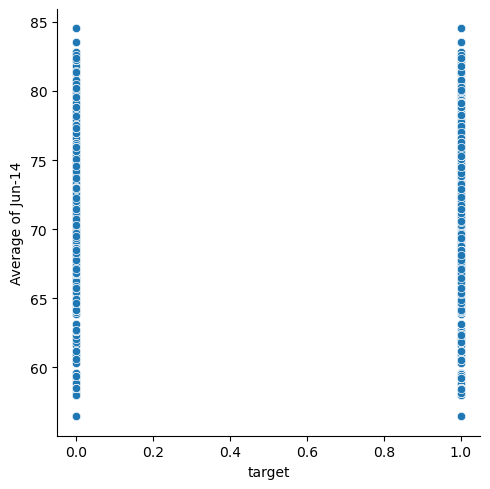

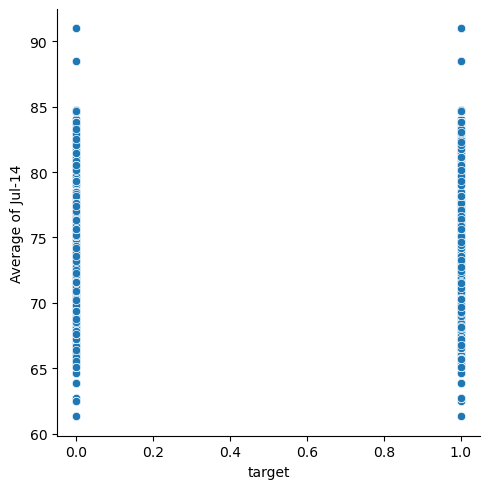

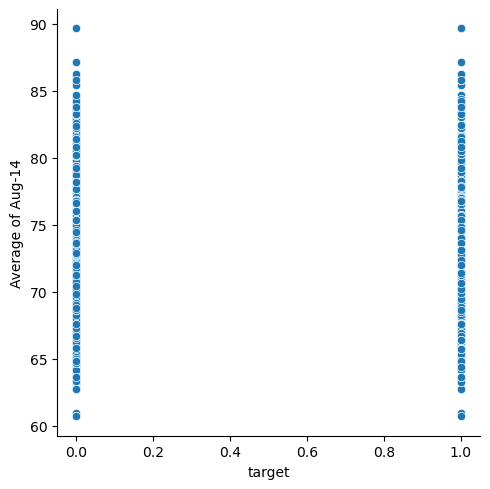

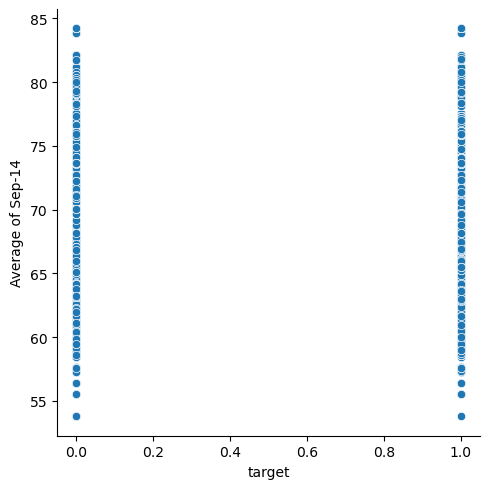

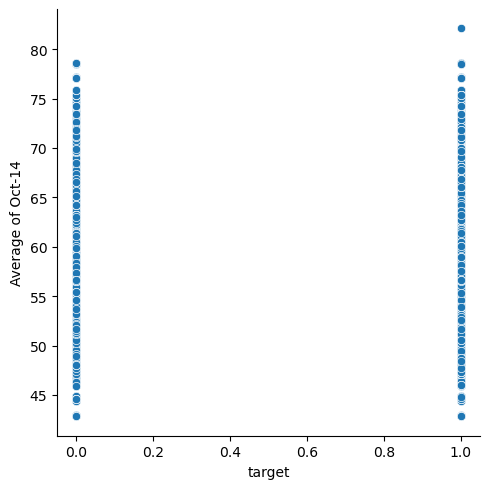

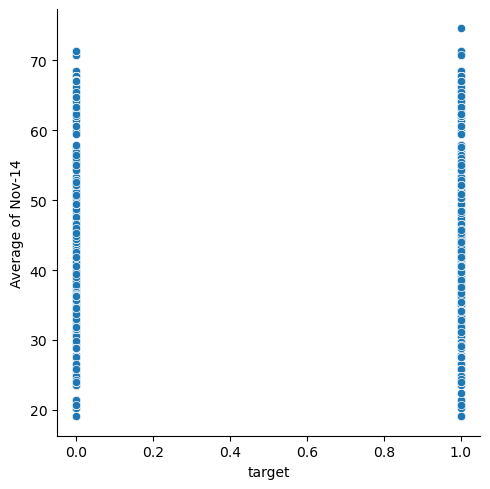

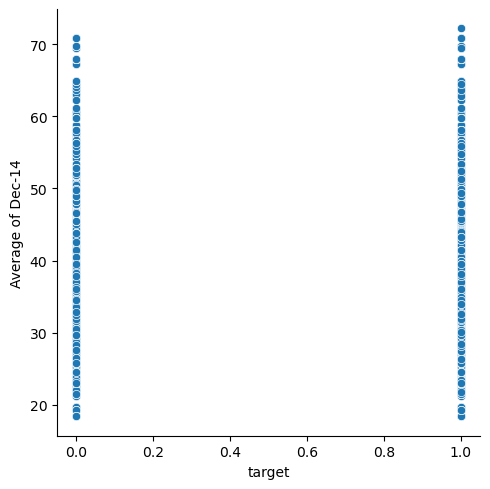

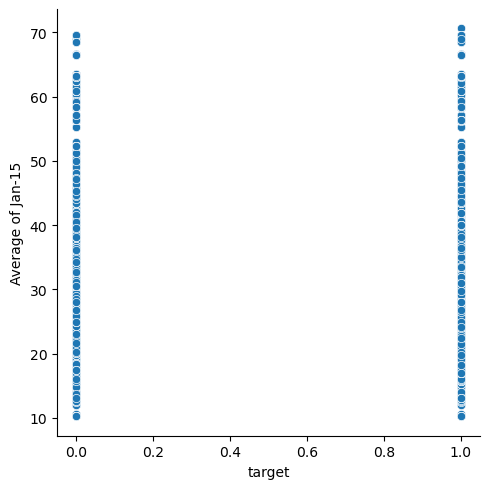

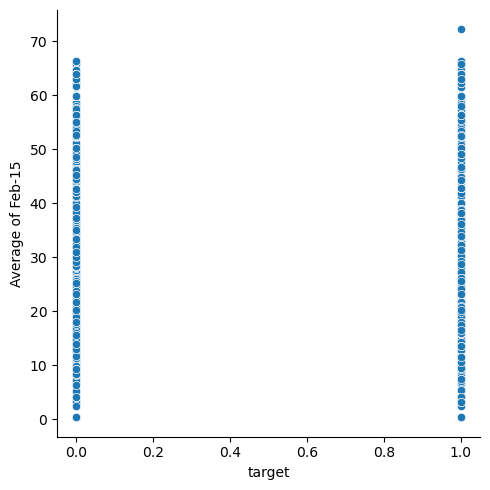

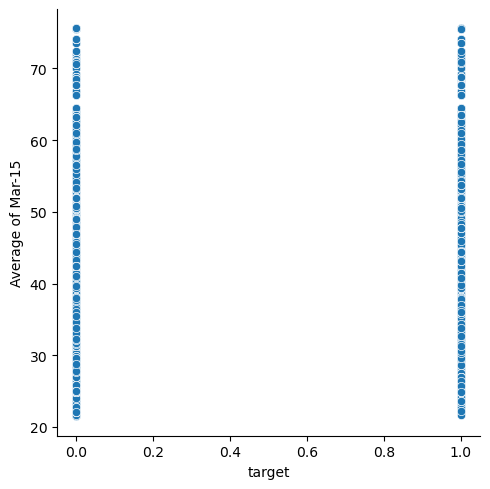

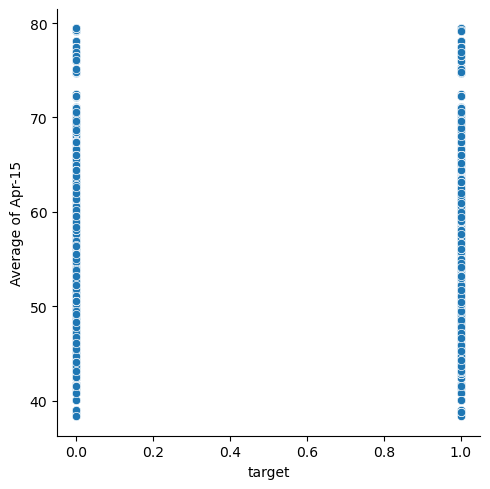

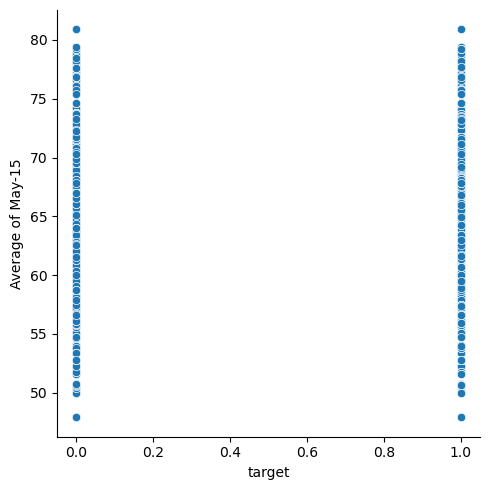

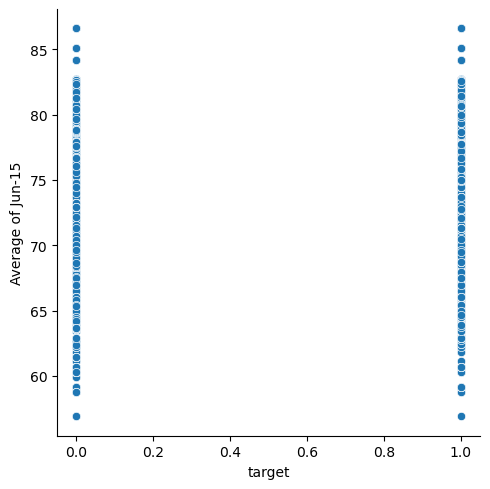

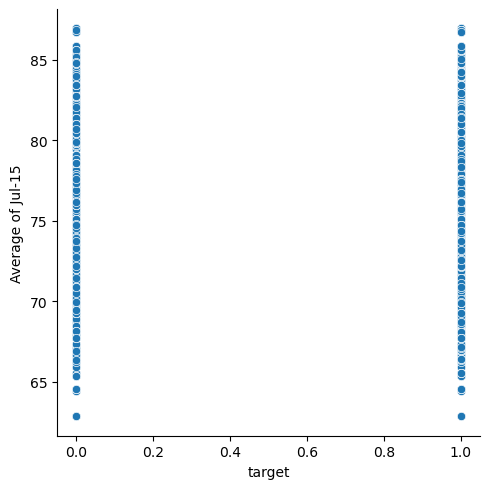

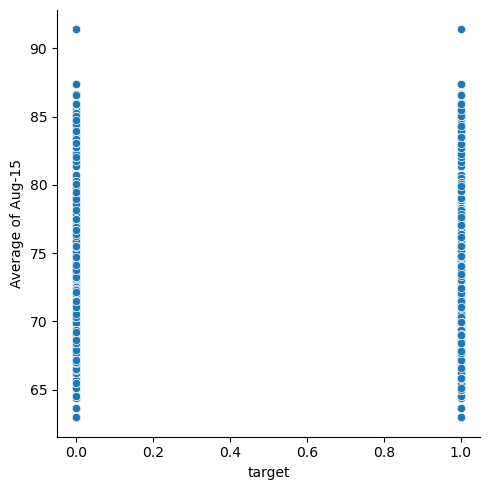

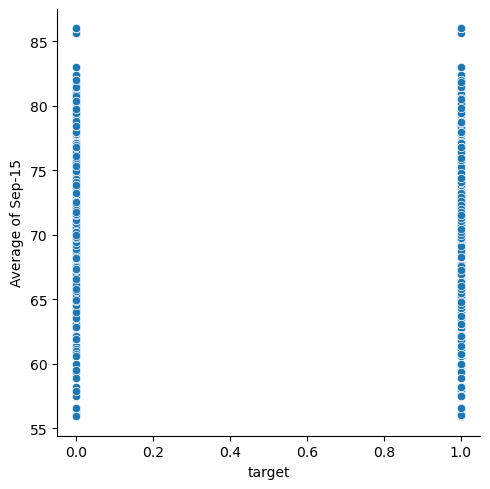

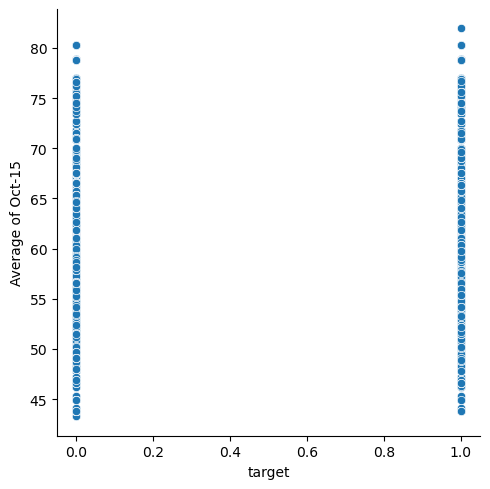

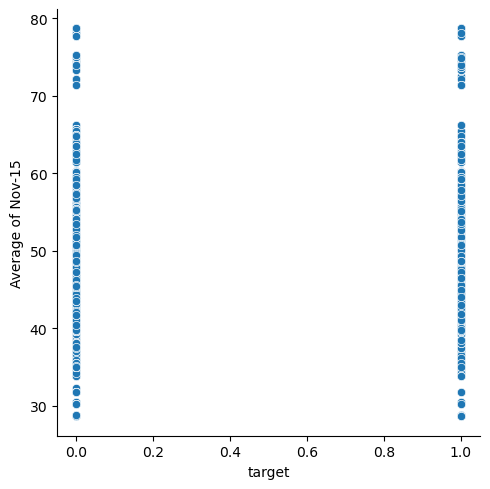

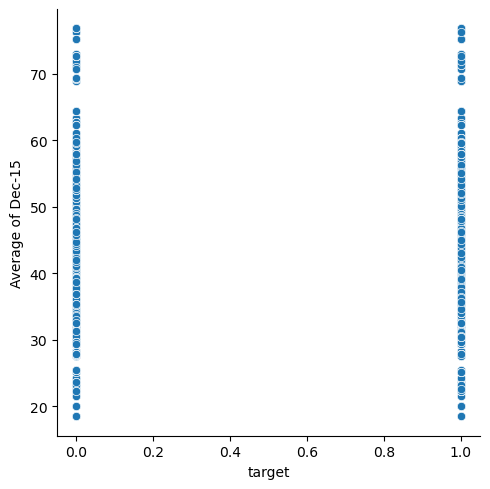

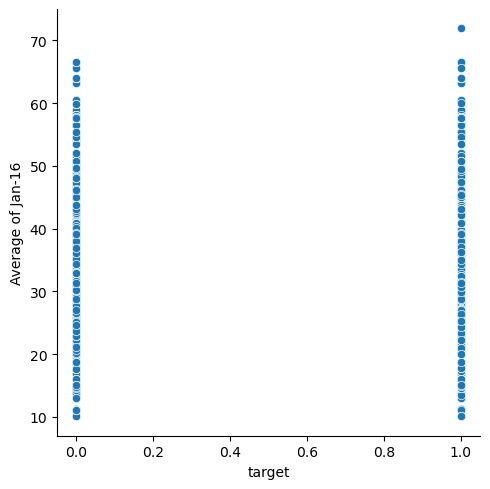

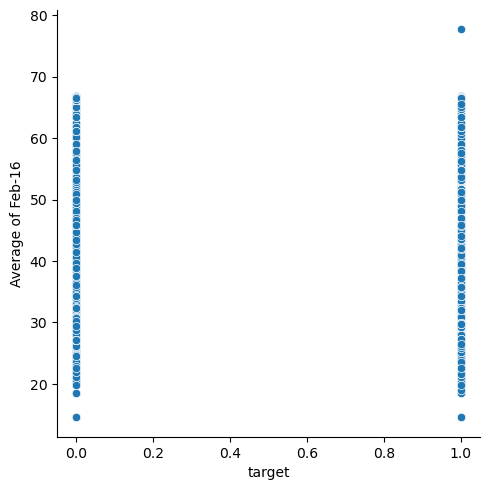

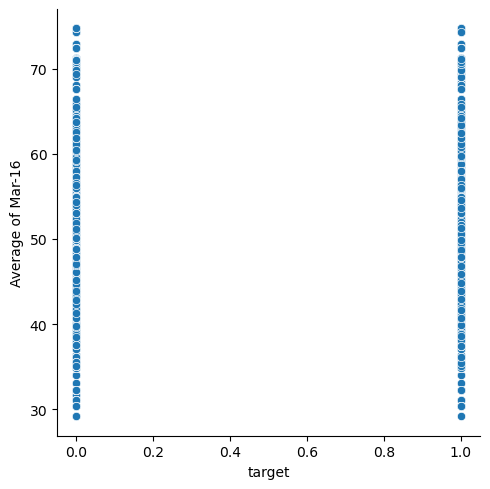

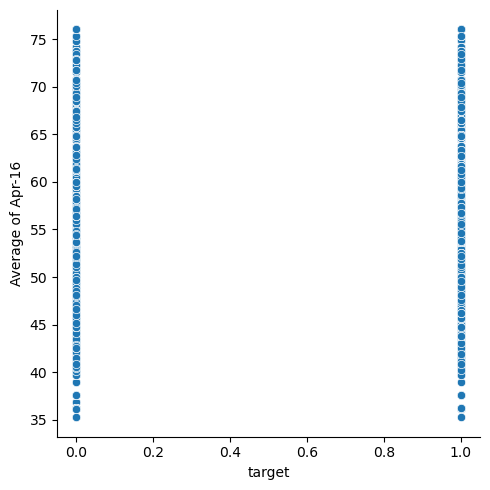

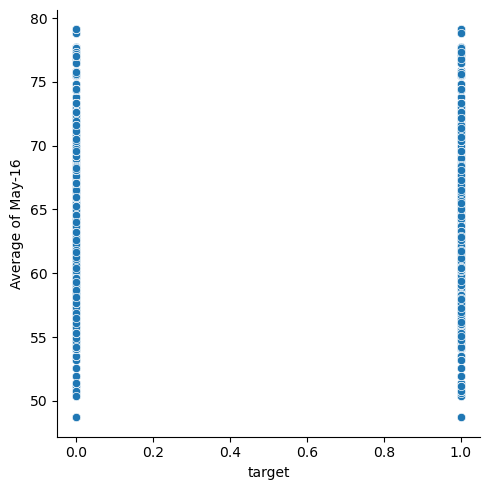

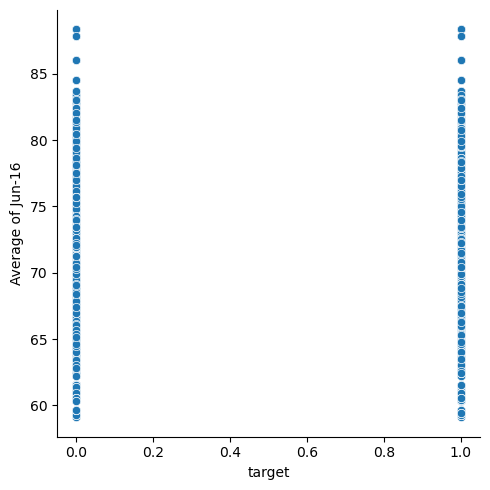

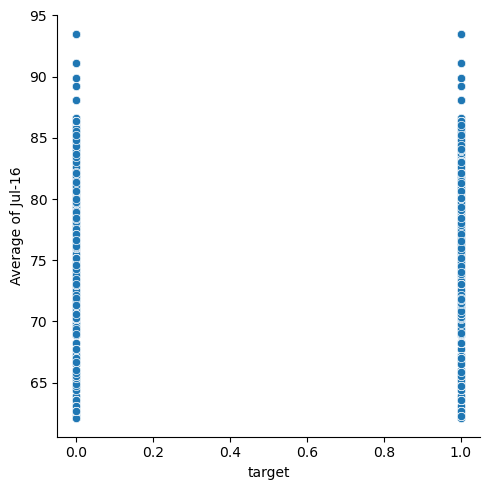

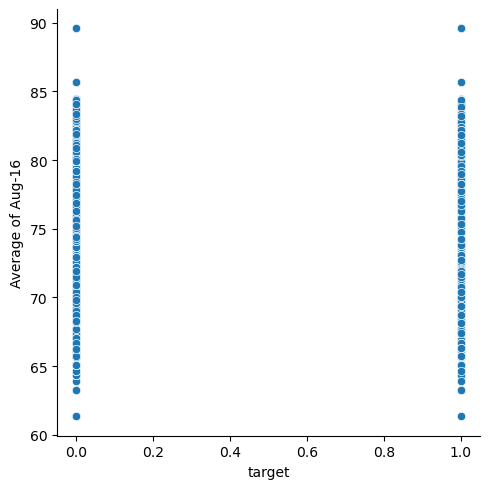

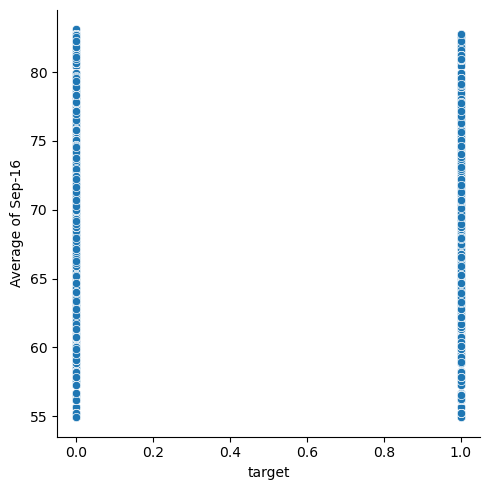

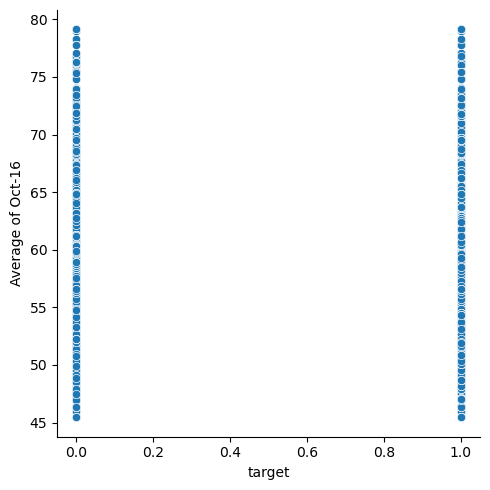

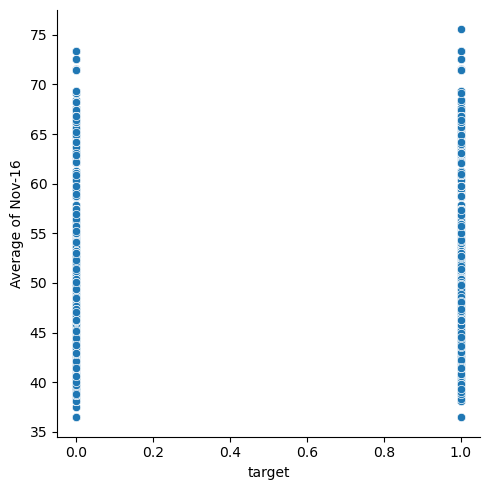

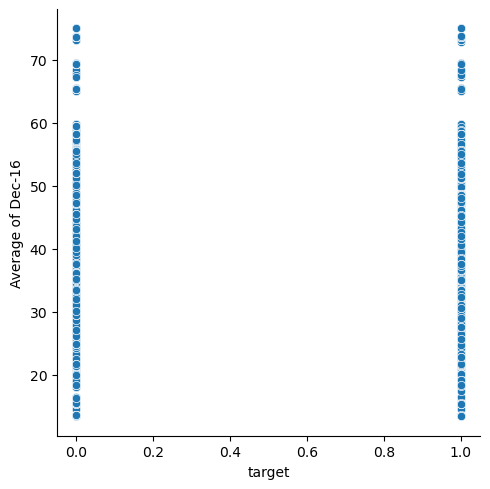

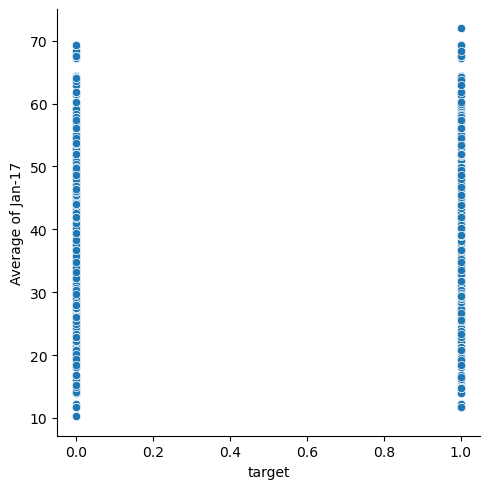

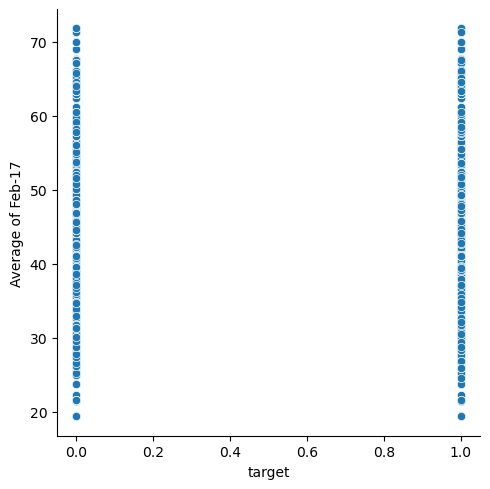

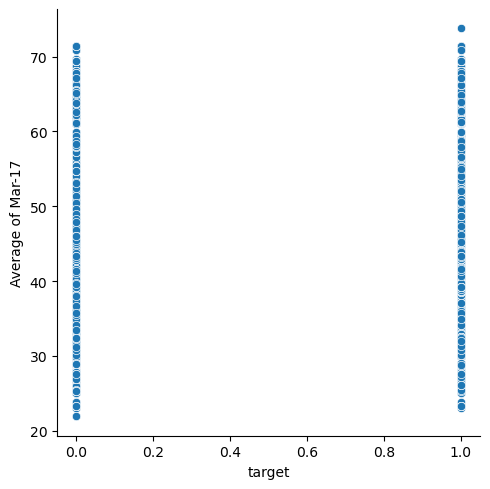

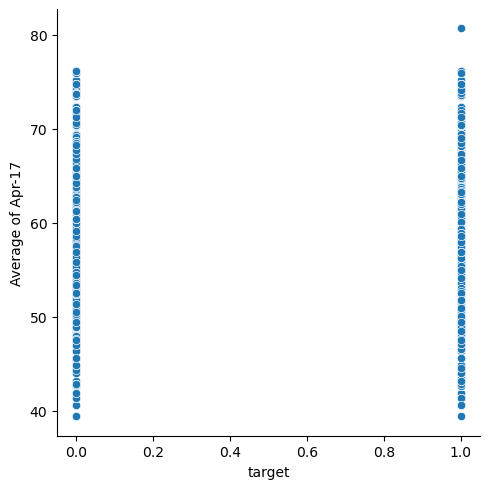

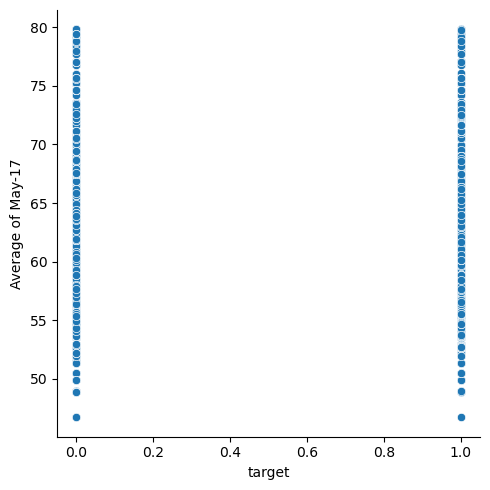

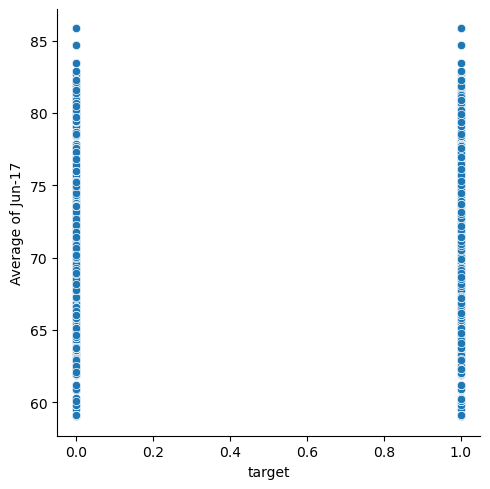

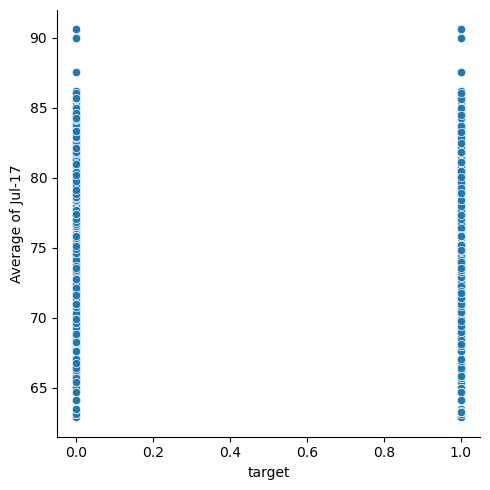

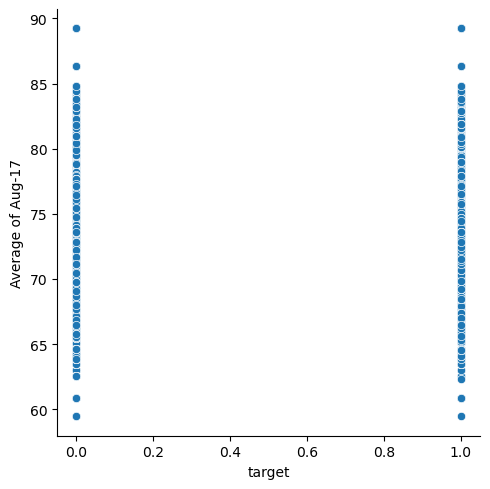

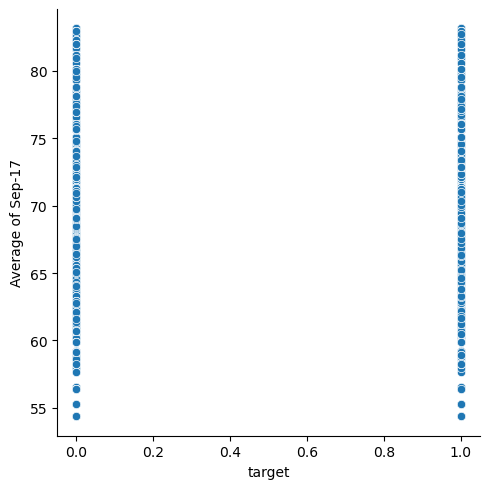

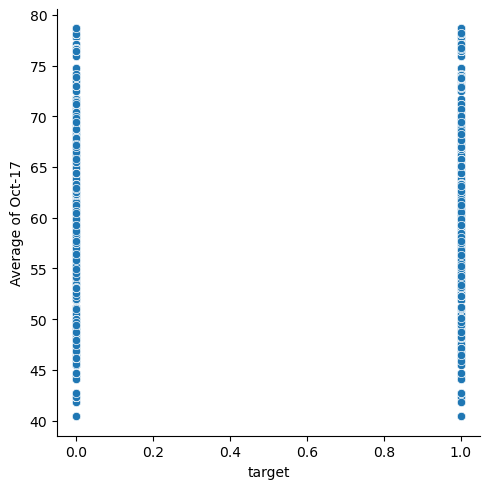

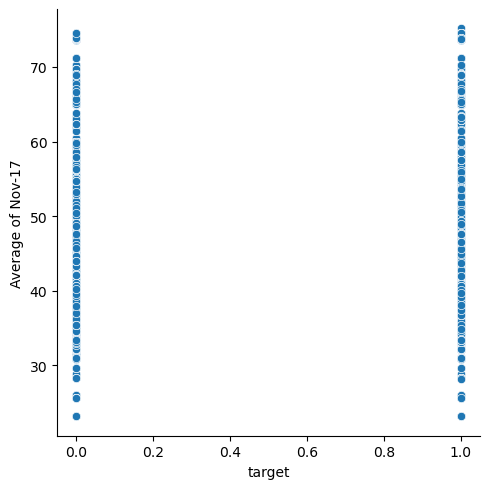

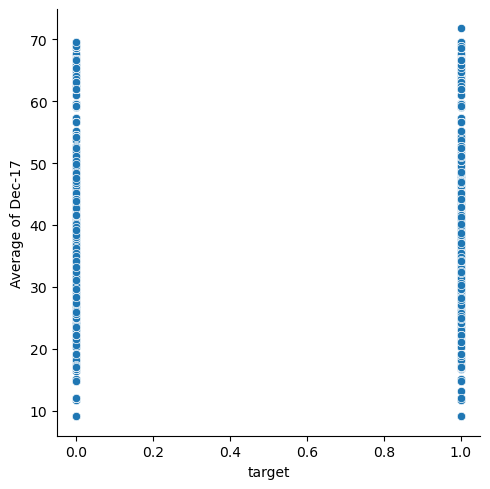

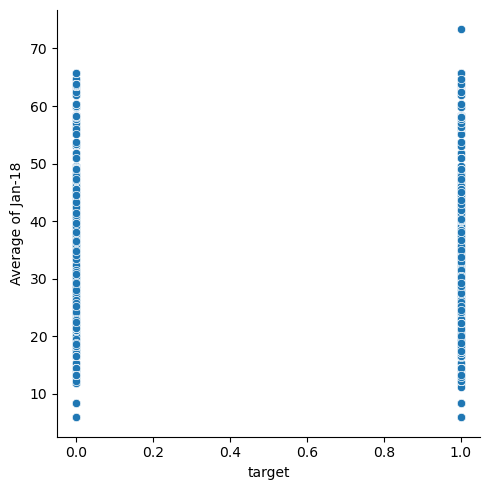

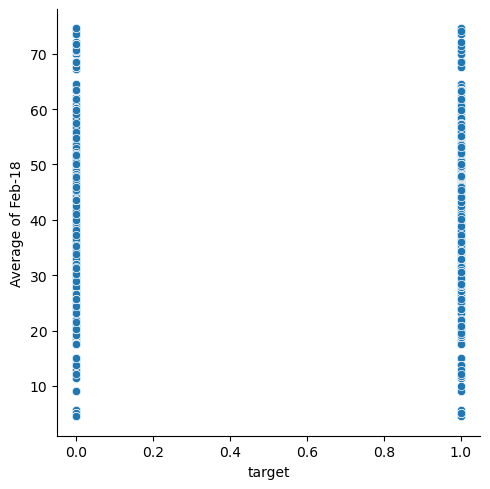

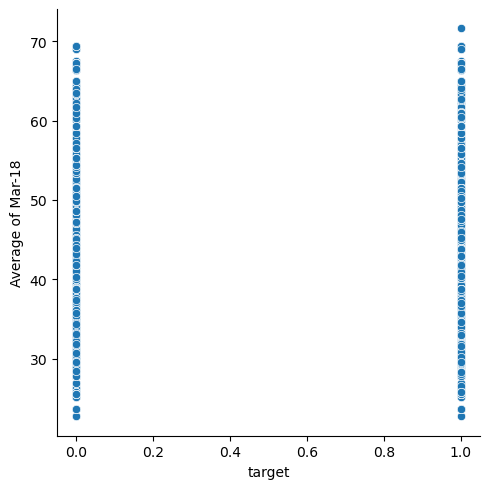

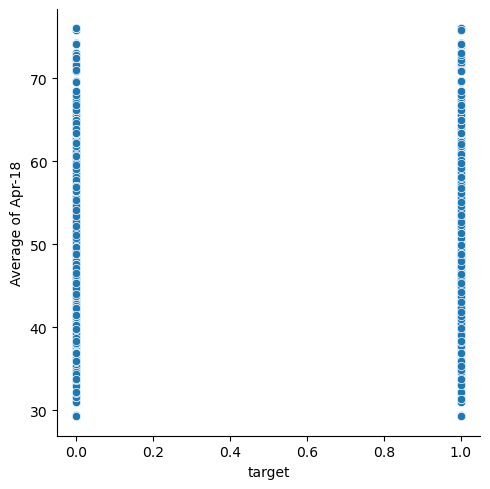

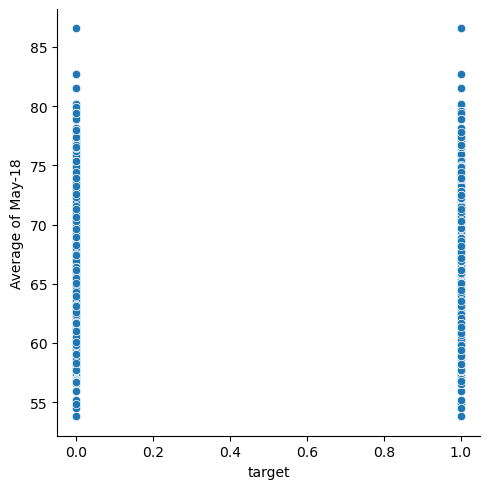

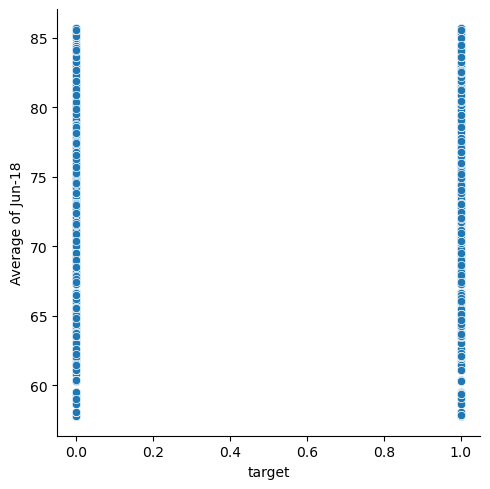

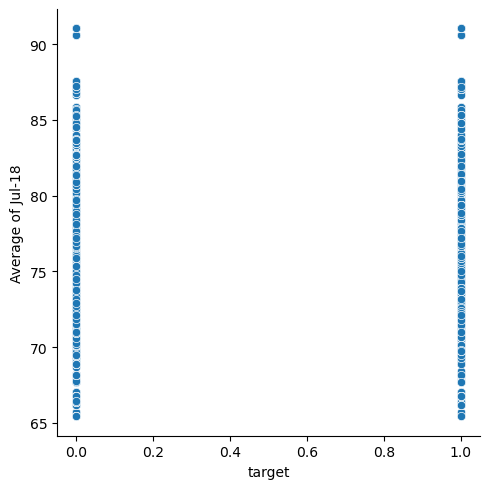

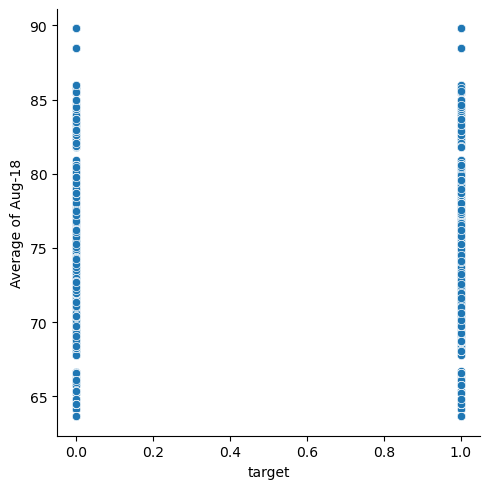

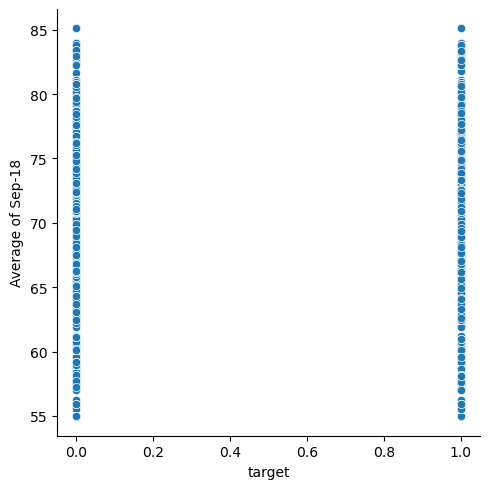

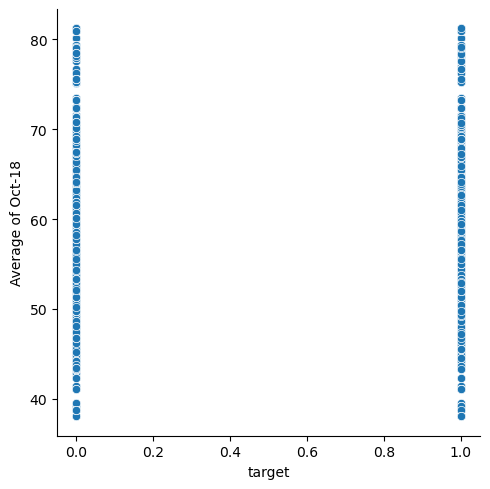

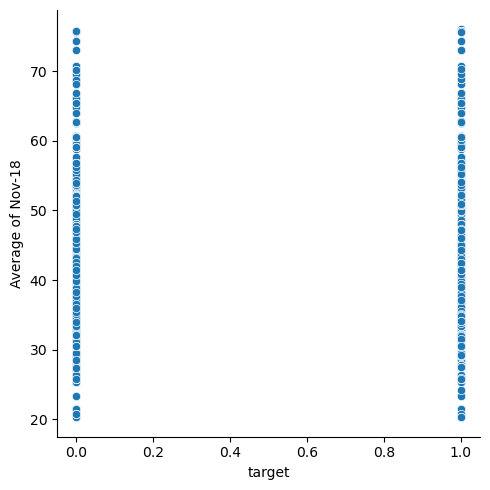

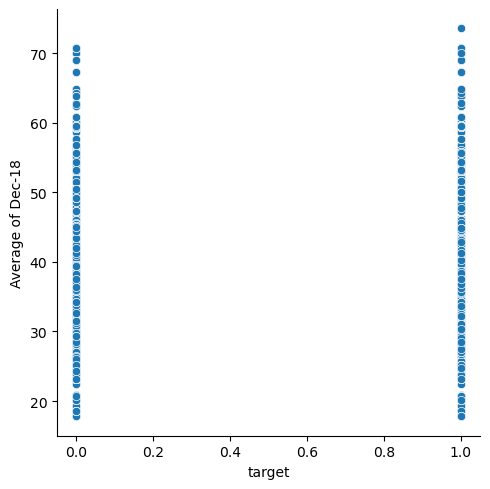

In [132]:
for i in cont_columns:
    sn.relplot(x='target', y=i, data=data_final, kind='scatter')

In [133]:
#Train Test Split

In [134]:
data_final

patient_race                payer_type patient_state     Region  \
0     Race Not Available                COMMERCIAL            AR      South   
1                  White  Payer Type Not Available            IL    Midwest   
2     Race Not Available                COMMERCIAL            CA       West   
3               Hispanic                  MEDICAID            CA       West   
4     Race Not Available                COMMERCIAL            CA       West   
...                  ...                       ...           ...        ...   
9178  Race Not Available                COMMERCIAL            WI    Midwest   
9179            Hispanic                  MEDICAID            PA  Northeast   
9180  Race Not Available                COMMERCIAL            TX      South   
9181  Race Not Available                COMMERCIAL            MI    Midwest   
9182            Hispanic                  MEDICAID            CA       West   

                Division                       breast_cancer_diagnosis_desc  \
0     West South Central  Malignant neoplasm of unspecified site of left...   
1     East North Central  Malig neoplasm of upper-outer quadrant of left...   
2                Pacific  Malignant neoplasm of breast (female), unspeci...   
3                Pacific  Malignant neoplasm of unsp site of right femal...   
4                Pacific  Malignant neoplasm of other specified sites of...   
...                  ...                                                ...   
9178  East North Central  Malignant neoplasm of unsp site of right femal...   
9179     Middle Atlantic  Malignant neoplasm of unsp site of right femal...   
9180  West South Central  Malignant neoplasm of breast (female), unspeci...   
9181  East North Central  Malignant neoplasm of upper-inner quadrant of ...   
9182             Pacific  Malignant neoplasm of unsp site of right femal...   

     metastatic_cancer_diagnosis_code  patient_age  population  density  ...  \
0                                C773         39.0     3924.87    82.63  ...   
1                                C773         55.0     2745.39    51.79  ...   
2                                C773         59.0    38343.18   700.34  ...   
3                                C773         59.0    36054.12  5294.33  ...   
4                               C7951         71.0    13700.37   400.48  ...   
...                               ...          ...         ...      ...  ...   
9178                             C773         36.0     8786.51   164.18  ...   
9179                             C773         59.0    31948.46  5512.17  ...   
9180                            C7951         73.0     9309.38   204.69  ...   
9181                             C779         52.0    23266.06   743.56  ...   
9182                             C787         63.0    36054.12  5294.33  ...   

      Average of Apr-18  Average of May-18  Average of Jun-18  \
0                 52.55              74.77              79.96   
1                 49.30              72.87              77.40   
2                 68.50              70.31              78.61   
3                 63.34              63.10              67.45   
4                 59.45              60.24              64.77   
...                 ...                ...                ...   
9178              35.36              61.32              66.09   
9179              48.81              66.12              70.38   
9180              62.03              77.82              84.52   
9181              39.93              63.56              68.68   
9182              63.34              63.10              67.45   

      Average of Jul-18  Average of Aug-18  Average of Sep-18  \
0                 81.69              78.30              74.56   
1                 77.43              75.83              72.64   
2                 87.24              85.52              80.75   
3                 75.86              75.24              71.10   
4                 69.81              70.13     

In [135]:
x_train,x_test,y_train,y_test=train_test_split(data_final.iloc[:,:-1],data_final.target,test_size=.25,random_state=42)

In [136]:
x_train

patient_race                payer_type patient_state     Region  \
8219               White                COMMERCIAL            PA  Northeast   
6708               White                COMMERCIAL            CA       West   
2276               White                COMMERCIAL            CA       West   
5873  Race Not Available        MEDICARE ADVANTAGE            CA       West   
6686  Race Not Available                COMMERCIAL            WI    Midwest   
...                  ...                       ...           ...        ...   
5734  Race Not Available                COMMERCIAL            OK      South   
5191               White        MEDICARE ADVANTAGE            CO       West   
5390  Race Not Available  Payer Type Not Available            IL    Midwest   
860   Race Not Available  Payer Type Not Available            TX      South   
7270  Race Not Available                COMMERCIAL            OH    Midwest   

                Division                       breast_cancer_diagnosis_desc  \
8219     Middle Atlantic  Malignant neoplasm of unsp site of unspecified...   
6708             Pacific  Malig neoplm of upper-outer quadrant of right ...   
2276             Pacific  Malignant neoplasm of lower-outer quadrant of ...   
5873             Pacific  Malignant neoplasm of unsp site of unspecified...   
6686  East North Central  Malignant neoplasm of unspecified site of left...   
...                  ...                                                ...   
5734  West South Central  Malignant neoplasm of ovrlp sites of right fem...   
5191            Mountain  Malig neoplm of lower-outer quadrant of right ...   
5390  East North Central  Malignant neoplasm of breast (female), unspeci...   
860   West South Central  Malignant neoplasm of unspecified site of left...   
7270  East North Central  Malignant neoplasm of unsp site of right femal...   

     metastatic_cancer_diagnosis_code  patient_age  population  density  ...  \
8219                            C7951         48.0     9682.82   339.64  ...   
6708                             C773         57.0    28996.77  2757.96  ...   
2276                             C773         46.0    36054.12  5294.33  ...   
5873                            C7951         73.0    30687.28  1917.93  ...   
6686                             C773         61.0    12654.11   352.36  ...   
...                               ...          ...         ...      ...  ...   
5734                             C773         59.0    16061.47   847.19  ...   
5191                             C773         84.0    25753.57  2463.90  ...   
5390                             C773         54.0    48671.14  6431.41  ...   
860                              C773         27.0    18516.47   141.36  ...   
7270                             C773         64.0     3767.28   314.16  ...   

      Average of Mar-18  Average of Apr-18  Average of May-18  \
8219              36.55              46.57              64.16   
6708              60.44              64.67              64.39   
2276              59.35              63.34              63.10   
5873              53.31              59.99              66.71   
6686              33.21              38.25              61.58   
...                 ...                ...                ...   
5734              53.55              54.78              74.93   
5191              43.94              49.70              62.59   
5390              37.62              42.26              67.44   
860               64.08              64.38              78.13   
7270              34.33              42.74              66.00   

      Average of Jun-18  Average of Jul-18  Average of Aug-18  \
8219              68.55              75.26              75.15   
6708              69.15              77.86              77.20   
2276              67.45              75.86              75.24   
5873              72.68              77.27              72.87   
6686              66.34              71.16     

In [137]:
x_test

patient_race                payer_type patient_state   Region  \
4004  Race Not Available  Payer Type Not Available            FL    South   
6412  Race Not Available                COMMERCIAL            WA     West   
8177            Hispanic  Payer Type Not Available            TX    South   
7612               White                COMMERCIAL            WI  Midwest   
8911  Race Not Available                COMMERCIAL            IL  Midwest   
...                  ...                       ...           ...      ...   
7493            Hispanic                  MEDICAID            CA     West   
2620               White        MEDICARE ADVANTAGE            IL  Midwest   
4818               Black                COMMERCIAL            MS    South   
7470  Race Not Available                COMMERCIAL            WA     West   
6410               Black                  MEDICAID            CA     West   

                Division                       breast_cancer_diagnosis_desc  \
4004      South Atlantic  Malig neoplasm of upper-outer quadrant of left...   
6412             Pacific  Malignant neoplasm of unspecified site of left...   
8177  West South Central  Malignant neoplasm of unsp site of right femal...   
7612  East North Central  Malignant neoplasm of ovrlp sites of right fem...   
8911  East North Central  Malignant neoplasm of unsp site of unspecified...   
...                  ...                                                ...   
7493             Pacific  Malignant neoplasm of unsp site of right femal...   
2620  East North Central  Malignant neoplasm of unsp site of unspecified...   
4818  East South Central  Malignant neoplasm of unspecified site of left...   
7470             Pacific  Malignant neoplasm of unsp site of right femal...   
6410             Pacific  Malignant neoplasm of unsp site of right femal...   

     metastatic_cancer_diagnosis_code  patient_age  population  density  ...  \
4004                            C7981         62.0    34958.92  1716.93  ...   
6412                             C773         52.0    11926.18   391.11  ...   
8177                            C7951         58.0    11771.21   101.90  ...   
7612                             C778         46.0     8786.51   164.18  ...   
8911                            C7961         63.0    20161.32  1062.61  ...   
...                               ...          ...         ...      ...  ...   
7493                             C773         63.0    37554.39  1706.02  ...   
2620                             C773         65.0    25744.48   981.76  ...   
4818                             C773         57.0     7979.74    90.59  ...   
7470                             C773         54.0    28628.29  1091.83  ...   
6410                            C7989         24.0    36054.12  5294.33  ...   

      Average of Mar-18  Average of Apr-18  Average of May-18  \
4004              69.43              76.01              78.16   
6412              42.96              48.46              58.24   
8177              66.77              66.68              81.52   
7612              31.53              35.36              61.32   
8911              35.43              39.74              65.88   
...                 ...                ...                ...   
7493              58.42              63.25              64.01   
2620              34.61              38.84              63.72   
4818              52.30              54.63              75.59   
7470              41.02              46.25              56.92   
6410              59.35              63.34              63.10   

      Average of Jun-18  Average of Jul-18  Average of Aug-18  \
4004              82.28              83.48              83.44   
6412              59.39              66.78              65.77   
8177              85.37              85.32              85.66   
7612              66.09              71.01              70.61   
8911              70.80              73.91              73.70   
...   

In [138]:
y_train

8219    1
6708    0
2276    1
5873    0
6686    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: target, Length: 6887, dtype: int64

In [139]:
y_test

4004    1
6412    1
8177    1
7612    0
8911    0
       ..
7493    0
2620    0
4818    0
7470    0
6410    0
Name: target, Length: 2296, dtype: int64

In [140]:
x_cat_train=x_train[cat_columns]
x_cat_test=x_test[cat_columns]

In [141]:
x_cont_train=x_train[cont_columns]
x_cont_test=x_test[cont_columns]

In [142]:
o=OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [143]:
x_cat_train_new=pd.DataFrame(o.fit_transform(x_cat_train),columns=list(o.get_feature_names_out()))

In [144]:
x_cat_train_new

patient_race_Asian  patient_race_Black  patient_race_Hispanic  \
0                    0.0                 0.0                    0.0   
1                    0.0                 0.0                    0.0   
2                    0.0                 0.0                    0.0   
3                    0.0                 0.0                    0.0   
4                    0.0                 0.0                    0.0   
...                  ...                 ...                    ...   
6882                 0.0                 0.0                    0.0   
6883                 0.0                 0.0                    0.0   
6884                 0.0                 0.0                    0.0   
6885                 0.0                 0.0                    0.0   
6886                 0.0                 0.0                    0.0   

      patient_race_Other  patient_race_Race Not Available  patient_race_White  \
0                    0.0                              0.0                 1.0   
1                    0.0                              0.0                 1.0   
2                    0.0                              0.0                 1.0   
3                    0.0                              1.0                 0.0   
4                    0.0                              1.0                 0.0   
...                  ...                              ...                 ...   
6882                 0.0                              1.0                 0.0   
6883                 0.0                              0.0                 1.0   
6884                 0.0                              1.0                 0.0   
6885                 0.0                              1.0                 0.0   
6886                 0.0                              1.0                 0.0   

      payer_type_COMMERCIAL  payer_type_MEDICAID  \
0                       1.0                  0.0   
1                       1.0                  0.0   
2                       1.0                  0.0   
3                       0.0                  0.0   
4                       1.0                  0.0   
...                     ...                  ...   
6882                    1.0                  0.0   
6883                    0.0                  0.0   
6884                    0.0                  0.0   
6885                    0.0                  0.0   
6886                    1.0                  0.0   

      payer_type_MEDICARE ADVANTAGE  payer_type_Payer Type Not Available  ...  \
0                               0.0                                  0.0  ...   
1                               0.0                                  0.0  ...   
2                               0.0                                  0.0  ...   
3                               1.0                                  0.0  ...   
4                               0.0                                  0.0  ...   
...                             ...                                  ...  ...   
6882                            0.0                                  0.0  ...   
6883                            1.0                                  0.0  ...   
6884                            0.0                                  1.0  ...   
6885                            0.0                                  1.0  ...   
6886                            0.0                                  0.0  ...   

      metastatic_cancer_diagnosis_code_C7952  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
6882                                     0.0   
6883                                     0.0   
6884                                     0.0   
6885                                     0.0   
6886                                     0.0   

     

In [145]:
#test data Prep

In [146]:
x_cat_test_new=pd.DataFrame(o.transform(x_cat_test),columns=list(o.get_feature_names_out()))

In [147]:
x_cat_test_new

patient_race_Asian  patient_race_Black  patient_race_Hispanic  \
0                    0.0                 0.0                    0.0   
1                    0.0                 0.0                    0.0   
2                    0.0                 0.0                    1.0   
3                    0.0                 0.0                    0.0   
4                    0.0                 0.0                    0.0   
...                  ...                 ...                    ...   
2291                 0.0                 0.0                    1.0   
2292                 0.0                 0.0                    0.0   
2293                 0.0                 1.0                    0.0   
2294                 0.0                 0.0                    0.0   
2295                 0.0                 1.0                    0.0   

      patient_race_Other  patient_race_Race Not Available  patient_race_White  \
0                    0.0                              1.0                 0.0   
1                    0.0                              1.0                 0.0   
2                    0.0                              0.0                 0.0   
3                    0.0                              0.0                 1.0   
4                    0.0                              1.0                 0.0   
...                  ...                              ...                 ...   
2291                 0.0                              0.0                 0.0   
2292                 0.0                              0.0                 1.0   
2293                 0.0                              0.0                 0.0   
2294                 0.0                              1.0                 0.0   
2295                 0.0                              0.0                 0.0   

      payer_type_COMMERCIAL  payer_type_MEDICAID  \
0                       0.0                  0.0   
1                       1.0                  0.0   
2                       0.0                  0.0   
3                       1.0                  0.0   
4                       1.0                  0.0   
...                     ...                  ...   
2291                    0.0                  1.0   
2292                    0.0                  0.0   
2293                    1.0                  0.0   
2294                    1.0                  0.0   
2295                    0.0                  1.0   

      payer_type_MEDICARE ADVANTAGE  payer_type_Payer Type Not Available  ...  \
0                               0.0                                  1.0  ...   
1                               0.0                                  0.0  ...   
2                               0.0                                  1.0  ...   
3                               0.0                                  0.0  ...   
4                               0.0                                  0.0  ...   
...                             ...                                  ...  ...   
2291                            0.0                                  0.0  ...   
2292                            1.0                                  0.0  ...   
2293                            0.0                                  0.0  ...   
2294                            0.0                                  0.0  ...   
2295                            0.0                                  0.0  ...   

      metastatic_cancer_diagnosis_code_C7952  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
2291                                     0.0   
2292                                     0.0   
2293                                     0.0   
2294                                     0.0   
2295                                     0.0   

     

In [148]:
s=StandardScaler()

In [149]:
x_cont_train_new=pd.DataFrame(s.fit_transform(x_cont_train),columns=cont_columns)

In [150]:
x_cont_train_new

patient_age  population   density  age_median  age_under_10  \
0       -0.881640   -0.810363 -0.504632    2.287837     -2.183033   
1       -0.196243    0.894075  1.282687   -0.040528     -0.986290   
2       -1.033950    1.516879  3.157254   -1.141259     -1.072896   
3        1.022240    1.043261  0.661842   -1.168846      0.391540   
4        0.108378   -0.548150 -0.495231    0.563633     -0.616244   
...           ...         ...       ...         ...           ...   
6882    -0.043933   -0.247453 -0.129514   -1.505411      1.800864   
6883     1.859947    0.607865  1.065355   -1.370233     -0.757963   
6884    -0.424709    2.630319  3.997641   -1.386786     -0.545384   
6885    -2.480899   -0.030802 -0.651175    0.875369     -0.301311   
6886     0.336843   -1.332404 -0.523463    0.900198     -1.183122   

      age_10_to_19   age_20s   age_30s   age_40s   age_50s  ...  \
0        -0.667700 -1.607202 -1.017288  1.374559  1.653452  ...   
1         1.593593  0.063295 -0.280326 -0.619258  0.326353  ...   
2        -1.047859  1.545363  2.054868  0.899397 -0.945736  ...   
3        -0.916769  1.146763  1.402257  0.377651 -0.821965  ...   
4        -0.182669 -0.599831 -0.435710 -0.004343  2.313563  ...   
...            ...       ...       ...       ...       ...  ...   
6882     -0.005698  1.168505  0.989380 -0.451554 -1.241411  ...   
6883     -1.840950  1.838878  3.053763  1.719285 -1.880893  ...   
6884     -1.454236  1.936716  2.703039 -0.144096 -1.337677  ...   
6885      0.046738 -0.777389 -0.684324  0.200629 -0.003702  ...   
6886      0.105728 -0.299069 -0.790872 -1.522998 -0.120597  ...   

      Average of Mar-18  Average of Apr-18  Average of May-18  \
0             -0.710300          -0.414434          -0.609671   
1              1.316980           1.248002          -0.571442   
2              1.224484           1.125846          -0.785857   
3              0.711936           0.818157          -0.185829   
4             -0.993728          -1.178604          -1.038500   
...                 ...                ...                ...   
6882           0.732302           0.339632           1.180440   
6883          -0.083192          -0.126952          -0.870625   
6884          -0.619501          -0.810296          -0.064494   
6885           1.625866           1.221367           1.712320   
6886          -0.898686          -0.766210          -0.303840   

      Average of Jun-18  Average of Jul-18  Average of Aug-18  \
0             -0.676070          -0.271725          -0.135690   
1             -0.580146           0.254587           0.289627   
2             -0.851932          -0.150268          -0.117017   
3             -0.015789           0.135155          -0.608725   
4             -1.029393          -1.101677          -0.948978   
...                 ...                ...                ...   
6882           1.018600           0.995471           0.878846   
6883           0.275183          -0.002496          -0.314115   
6884          -0.057356           0.015722           0.295851   
6885           1.857941           1.871982           2.034462   
6886          -0.252403          -0.466055          -0.293368   

      Average of Sep-18  Average of Oct-18  Average of Nov-18  \
0             -0.531686          -0.456723          -0.461447   
1              0.295972           1.273487           1.768193   
2              0.015246           1.137379           1.711150   
3             -0.004114           0.860807           0.891052   
4             -1.054417          -1.073022          -1.069080   
...                 ...                ...                ...   
6882           0.441175           0.199864           0.080049   
6883          -0.321948          -0.955425          -0.403577   
6884          -0.179971          -0.568877          -0.792132   
6885           1.167191           1.020870           0.776140   
6886          -0.370349          -0.571054          -0.721034   

      Average of Dec-18  
0  

In [151]:
#test data prep

In [152]:
x_cont_test_new=pd.DataFrame(s.transform(x_cont_test),columns=cont_columns)

In [153]:
x_cont_test_new

patient_age  population   density  age_median  age_under_10  \
0        0.184533    1.420229  0.513288    0.715363     -0.387918   
1       -0.577019   -0.612389 -0.466592    0.872610     -0.340678   
2       -0.120088   -0.626065 -0.680339    0.105685      1.556791   
3       -1.033950   -0.889462 -0.634310    1.016064     -0.521764   
4        0.260688    0.114355  0.029697   -0.150877      0.430907   
...           ...         ...       ...         ...           ...   
2291     0.260688    1.649277  0.505225   -0.363299      0.060861   
2292     0.412998    0.607063 -0.030057    0.268450      0.517514   
2293    -0.196243   -0.960658 -0.688698   -0.498476      0.785206   
2294    -0.424709    0.861557  0.051293   -0.305365      0.800953   
2295    -2.709364    1.516879  3.157254   -1.141259     -1.072896   

      age_10_to_19   age_20s   age_30s   age_40s   age_50s  ...  \
0        -0.969205 -0.639691 -0.124942  1.234806  0.869570  ...   
1        -1.447682  0.016188 -0.164898 -0.190681 -0.883850  ...   
2         0.322026 -0.723035 -1.301419 -1.075787 -0.540042  ...   
3        -0.313758 -1.016549 -0.435710 -0.321117  1.887241  ...   
4         0.033629 -0.125134  0.026002  0.200629  0.745799  ...   
...            ...       ...       ...       ...       ...  ...   
2291      0.970918  0.168381 -0.053910  1.001883  0.477629  ...   
2292      0.656304 -0.867980 -0.662126  0.433552  0.924579  ...   
2293      1.298642  0.197370 -0.906300  0.433552 -0.258120  ...   
2294     -0.267877 -0.596207  1.064852  2.166496  0.298849  ...   
2295     -1.047859  1.545363  2.054868  0.899397 -0.945736  ...   

      Average of Mar-18  Average of Apr-18  Average of May-18  \
0              2.079862           2.289551           1.717307   
1             -0.166354          -0.240843          -1.593651   
2              1.854137           1.432616           2.275782   
3             -1.136291          -1.444043          -1.081715   
4             -0.805342          -1.041752          -0.323785   
...                 ...                ...                ...   
2291           1.145565           1.117579          -0.634603   
2292          -0.874926          -1.124414          -0.682805   
2293           0.626228           0.325855           1.290140   
2294          -0.330980          -0.443825          -1.813051   
2295           1.224484           1.125846          -0.785857   

      Average of Jun-18  Average of Jul-18  Average of Aug-18  \
0              1.519007           1.392229           1.584249   
1             -2.140521          -1.988309          -2.081772   
2              2.013019           1.764696           2.044836   
3             -1.069362          -1.132041          -1.077610   
4             -0.316353          -0.545002          -0.436523   
...                 ...                ...                ...   
2291          -0.517795           0.363898           0.190041   
2292          -0.668077          -0.751478          -0.573455   
2293           1.090543           0.920573           0.731541   
2294          -2.381932          -2.113815          -2.197956   
2295          -0.851932          -0.150268          -0.117017   

      Average of Sep-18  Average of Oct-18  Average of Nov-18  \
0              1.891593           2.441842           2.566796   
1             -2.075679          -0.880293           0.021352   
2              1.501158           1.199444           0.986951   
3             -1.238341          -1.230908          -1.179859   
4             -0.670435          -0.883559          -0.948380   
...                 ...                ...                ...   
2291           0.263705           1.103624           1.592930   
2292          -0.804345          -0.929292          -0.984755   
2293           0.867104           0.571168           0.144532   
2294          -2.175708          -0.977202          -0.083640   
2295           0.015246           1.137379           1.711150   

      Average of Dec-18  
0  

In [154]:
X_train=pd.concat((x_cat_train_new,x_cont_train_new),axis=1)
X_test=pd.concat((x_cat_test_new,x_cont_test_new),axis=1)

In [155]:
X_train

patient_race_Asian  patient_race_Black  patient_race_Hispanic  \
0                    0.0                 0.0                    0.0   
1                    0.0                 0.0                    0.0   
2                    0.0                 0.0                    0.0   
3                    0.0                 0.0                    0.0   
4                    0.0                 0.0                    0.0   
...                  ...                 ...                    ...   
6882                 0.0                 0.0                    0.0   
6883                 0.0                 0.0                    0.0   
6884                 0.0                 0.0                    0.0   
6885                 0.0                 0.0                    0.0   
6886                 0.0                 0.0                    0.0   

      patient_race_Other  patient_race_Race Not Available  patient_race_White  \
0                    0.0                              0.0                 1.0   
1                    0.0                              0.0                 1.0   
2                    0.0                              0.0                 1.0   
3                    0.0                              1.0                 0.0   
4                    0.0                              1.0                 0.0   
...                  ...                              ...                 ...   
6882                 0.0                              1.0                 0.0   
6883                 0.0                              0.0                 1.0   
6884                 0.0                              1.0                 0.0   
6885                 0.0                              1.0                 0.0   
6886                 0.0                              1.0                 0.0   

      payer_type_COMMERCIAL  payer_type_MEDICAID  \
0                       1.0                  0.0   
1                       1.0                  0.0   
2                       1.0                  0.0   
3                       0.0                  0.0   
4                       1.0                  0.0   
...                     ...                  ...   
6882                    1.0                  0.0   
6883                    0.0                  0.0   
6884                    0.0                  0.0   
6885                    0.0                  0.0   
6886                    1.0                  0.0   

      payer_type_MEDICARE ADVANTAGE  payer_type_Payer Type Not Available  ...  \
0                               0.0                                  0.0  ...   
1                               0.0                                  0.0  ...   
2                               0.0                                  0.0  ...   
3                               1.0                                  0.0  ...   
4                               0.0                                  0.0  ...   
...                             ...                                  ...  ...   
6882                            0.0                                  0.0  ...   
6883                            1.0                                  0.0  ...   
6884                            0.0                                  1.0  ...   
6885                            0.0                                  1.0  ...   
6886                            0.0                                  0.0  ...   

      Average of Mar-18  Average of Apr-18  Average of May-18  \
0             -0.710300          -0.414434          -0.609671   
1              1.316980           1.248002          -0.571442   
2              1.224484           1.125846          -0.785857   
3              0.711936           0.818157          -0.185829   
4             -0.993728          -1.178604          -1.038500   
...                 ...                ...                ...   
6882           0.732302           0.339632           1.180440   
6883          -0.083192          -0.126952          -0.870625 

In [156]:
X_test

patient_race_Asian  patient_race_Black  patient_race_Hispanic  \
0                    0.0                 0.0                    0.0   
1                    0.0                 0.0                    0.0   
2                    0.0                 0.0                    1.0   
3                    0.0                 0.0                    0.0   
4                    0.0                 0.0                    0.0   
...                  ...                 ...                    ...   
2291                 0.0                 0.0                    1.0   
2292                 0.0                 0.0                    0.0   
2293                 0.0                 1.0                    0.0   
2294                 0.0                 0.0                    0.0   
2295                 0.0                 1.0                    0.0   

      patient_race_Other  patient_race_Race Not Available  patient_race_White  \
0                    0.0                              1.0                 0.0   
1                    0.0                              1.0                 0.0   
2                    0.0                              0.0                 0.0   
3                    0.0                              0.0                 1.0   
4                    0.0                              1.0                 0.0   
...                  ...                              ...                 ...   
2291                 0.0                              0.0                 0.0   
2292                 0.0                              0.0                 1.0   
2293                 0.0                              0.0                 0.0   
2294                 0.0                              1.0                 0.0   
2295                 0.0                              0.0                 0.0   

      payer_type_COMMERCIAL  payer_type_MEDICAID  \
0                       0.0                  0.0   
1                       1.0                  0.0   
2                       0.0                  0.0   
3                       1.0                  0.0   
4                       1.0                  0.0   
...                     ...                  ...   
2291                    0.0                  1.0   
2292                    0.0                  0.0   
2293                    1.0                  0.0   
2294                    1.0                  0.0   
2295                    0.0                  1.0   

      payer_type_MEDICARE ADVANTAGE  payer_type_Payer Type Not Available  ...  \
0                               0.0                                  1.0  ...   
1                               0.0                                  0.0  ...   
2                               0.0                                  1.0  ...   
3                               0.0                                  0.0  ...   
4                               0.0                                  0.0  ...   
...                             ...                                  ...  ...   
2291                            0.0                                  0.0  ...   
2292                            1.0                                  0.0  ...   
2293                            0.0                                  0.0  ...   
2294                            0.0                                  0.0  ...   
2295                            0.0                                  0.0  ...   

      Average of Mar-18  Average of Apr-18  Average of May-18  \
0              2.079862           2.289551           1.717307   
1             -0.166354          -0.240843          -1.593651   
2              1.854137           1.432616           2.275782   
3             -1.136291          -1.444043          -1.081715   
4             -0.805342          -1.041752          -0.323785   
...                 ...                ...                ...   
2291           1.145565           1.117579          -0.634603   
2292          -0.874926          -1.124414          -0.682805 

In [478]:
#running model with full feaures

In [479]:
#SVM

In [158]:
#svm_f=SVC(class_weight='balanced')
#param_f={'C':[.01,.1,1,10],'kernel':['rbf']}
#g_svm_f=GridSearchCV(estimator=svm_f,param_grid=param_f,scoring='recall')
#g_svm_f.fit(X_train,y_train)

In [159]:
#g_svm_f.best_params_

In [160]:
#y_svm_full_predict=g_svm_f.predict(X_test)

In [161]:
#mertics

In [162]:
#f1_score(y_test,y_svm_full_predict)

In [163]:
#precision_score(y_test,y_svm_full_predict)

In [164]:
#recall_score(y_test,y_svm_full_predict)

In [165]:
#Random Forest

In [166]:
#rf_f=RandomForestClassifier(class_weight='balanced',n_estimators=100)
#param_rf={'max_depth':[5,7,9,11,13],'min_samples_leaf':[5,7,9,11,13],'min_samples_split':[5,7,9,11,13]}
#g_rf_f=GridSearchCV(estimator=rf_f,param_grid=param_rf,scoring='recall')
#g_rf_f.fit(X_train,y_train)

In [167]:
#g_rf_f.best_params_

In [168]:
#y_rf_full_predict=g_rf_f.predict(X_test)

In [498]:
#Metrics

In [169]:
#f1_score(y_test,y_rf_full_predict)

In [170]:
#precision_score(y_test,y_rf_full_predict)

In [171]:
#recall_score(y_test,y_rf_full_predict)

In [270]:
#feature selection with precision

In [271]:
c_et=ExtraTreesClassifier(class_weight='balanced',n_estimators=100)
param_et={'max_depth':[5,7,9,11,13],'min_samples_leaf':[5,7,9,11,13],'min_samples_split':[5,7,9,11,13]}
g_et=GridSearchCV(estimator=c_et,param_grid=param_et,scoring='precision')
g_et.fit(X_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(class_weight='balanced'),
             param_grid={'max_depth': [5, 7, 9, 11, 13],
                         'min_samples_leaf': [5, 7, 9, 11, 13],
                         'min_samples_split': [5, 7, 9, 11, 13]},
             scoring='precision')

In [272]:
g_et.best_params_

{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 11}

In [301]:
e=ExtraTreesClassifier(class_weight='balanced',n_estimators=100,max_depth=7,min_samples_leaf=5,min_samples_split
=11)

In [302]:
e=e.fit(X_train,y_train)

In [303]:
#feature importances
f_i=pd.DataFrame({'feature':list(o.get_feature_names_out())+cont_columns,'importance':list(e.feature_importances_)})

In [304]:
f_i

feature  importance
0                 patient_race_Asian    0.000432
1                 patient_race_Black    0.001131
2              patient_race_Hispanic    0.000833
3                 patient_race_Other    0.000571
4    patient_race_Race Not Available    0.001532
..                               ...         ...
274                Average of Aug-18    0.000845
275                Average of Sep-18    0.001056
276                Average of Oct-18    0.001211
277                Average of Nov-18    0.000781
278                Average of Dec-18    0.000981

[279 rows x 2 columns]

In [305]:
#top 10 features

In [306]:
f_i.sort_values(by='importance',ascending=False).iloc[:10]

feature  importance
77   breast_cancer_diagnosis_desc_Malignant neoplas...    0.264515
104  breast_cancer_diagnosis_desc_Malignant neoplas...    0.083036
98   breast_cancer_diagnosis_desc_Malignant neoplas...    0.062121
93   breast_cancer_diagnosis_desc_Malignant neoplas...    0.055885
99   breast_cancer_diagnosis_desc_Malignant neoplas...    0.055418
100  breast_cancer_diagnosis_desc_Malignant neoplas...    0.054570
73   breast_cancer_diagnosis_desc_Malig neoplm of u...    0.045769
67   breast_cancer_diagnosis_desc_Malig neoplasm of...    0.038193
95   breast_cancer_diagnosis_desc_Malignant neoplas...    0.036070
109              metastatic_cancer_diagnosis_code_C773    0.020531

In [307]:
sum(e.feature_importances_)

0.9999999999999996

In [308]:
f_i.importance.mean()

0.0035842293906810036

In [309]:
f_i.importance.median()

0.0007497299011062421

In [310]:
model=SelectFromModel(e,prefit=True,threshold=f_i.importance.mean())

In [311]:
X_train_new=model.transform(X_train)

In [312]:
X_train_new.shape

(6887, 25)

In [313]:
#f_i.sort_values(by='importance',ascending=False).iloc[:140]

In [314]:
X_test_new=model.transform(X_test)

In [315]:
X_test_new.shape

(2296, 25)

In [316]:
#SVM

In [317]:
svm_=SVC(class_weight='balanced')
param_={'C':[.01,.1,1,10],'kernel':['linear','rbf']}
g_svm_=GridSearchCV(estimator=svm_,param_grid=param_,scoring='precision')
g_svm_.fit(X_train_new,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='precision')

In [318]:
g_svm_.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [319]:
y_pred_svm=g_svm_.predict(X_test_new)

In [320]:
f1_score(y_test,y_pred_svm)

0.6477611940298508

In [321]:
precision_score(y_test,y_pred_svm)

0.8857142857142857

In [322]:
recall_score(y_test,y_pred_svm)

0.5105882352941177

In [323]:
Counter(y_pred_svm)

Counter({0: 1806, 1: 490})

In [324]:
Counter(y_test)

Counter({0: 1446, 1: 850})

In [325]:
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(g_svm_, f)

In [326]:
#Random Forest

In [327]:
rf=RandomForestClassifier(class_weight='balanced',n_estimators=100)
p_rf={'max_depth':[3,5,7,9,11,13],'min_samples_leaf':[3,5,7,9,11,13],'min_samples_split':[3,5,7,9,11,13]}
g_rf=GridSearchCV(estimator=rf,param_grid=p_rf,scoring='precision')
g_rf.fit(X_train_new,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'min_samples_leaf': [3, 5, 7, 9, 11, 13],
                         'min_samples_split': [3, 5, 7, 9, 11, 13]},
             scoring='precision')

In [328]:
g_rf.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 7}

In [329]:
y_pred_rf=g_rf.predict(X_test_new)

In [330]:
f1_score(y_test,y_pred_rf)

0.6477611940298508

In [331]:
precision_score(y_test,y_pred_rf)

0.8857142857142857

In [332]:
recall_score(y_test,y_pred_rf)

0.5105882352941177

In [333]:
Counter(y_pred_rf)

Counter({0: 1806, 1: 490})

In [334]:
Counter(y_test)

Counter({0: 1446, 1: 850})

In [335]:
accuracy_score(y_test,y_pred_rf)

0.794425087108014

In [213]:
#feature selection with high flase negatives

In [338]:
#def false_negatives(y_true, y_pred):
#    from sklearn.metrics import confusion_matrix
#    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#    return fn

# Create a scorer that returns the number of false negatives
#fn_scorer = make_scorer(false_negatives, greater_is_better=True)

In [339]:
#c_et_fn=ExtraTreesClassifier(class_weight='balanced',n_estimators=100)
#param_et={'max_depth':[5,7,9,11,13],'min_samples_leaf':[5,7,9,11,13],'min_samples_split':[5,7,9,11,13]}
#g_et_fn=GridSearchCV(estimator=c_et,param_grid=param_et,scoring=fn_scorer)
#g_et_fn.fit(X_train,y_train)

In [340]:
#g_et_fn.best_params_

In [341]:
#e_fn=ExtraTreesClassifier(class_weight='balanced',n_estimators=100,max_depth=5,min_samples_leaf=13,min_samples_split#
#=11)

In [342]:
#e_fn=e_fn.fit(X_train,y_train)

In [343]:
#f_i_fn=pd.DataFrame({'feature':list(o.get_feature_names_out())+cont_columns,'importance':list(e_fn.feature_importances_)})

In [344]:
#sum(e_fn.feature_importances_)

In [345]:
#f_i_fn.importance.mean()

In [346]:
#f_i_fn.importance.median()

In [347]:
#model_fn=SelectFromModel(e_fn,prefit=True,threshold=f_i_fn.importance.mean())

In [348]:
#X_train_new_fn=model.transform(X_train)

In [349]:
#X_train_new_fn.shape

In [350]:
#X_test_new_fn=model.transform(X_test)

In [351]:
#X_test_new_fn.shape

In [236]:
#SVM

In [352]:
#svm_fn=SVC(class_weight='balanced')
#param_={'C':[.01,.1,1,10],'kernel':['linear','rbf']}
#g_svm_fn=GridSearchCV(estimator=svm_,param_grid=param_,scoring=fn_scorer)
#g_svm_fn.fit(X_train_new_fn,y_train)

In [353]:
#g_svm_fn.best_params_

In [239]:
#y_pred_svm_fn=g_svm_fn.predict(X_test_new)

In [354]:
#f1_score(y_test,y_pred_svm_fn)

In [355]:
#precision_score(y_test,y_pred_svm_fn)

In [356]:
#recall_score(y_test,y_pred_svm_fn)

In [357]:
#Counter(y_pred_svm_fn)

In [358]:
#Counter(y_test)

In [ ]:
#Random Forest

In [359]:
#rf_fn=RandomForestClassifier(class_weight='balanced',n_estimators=100)
#p_rf={'max_depth':[3,5,7,9,11,13],'min_samples_leaf':[3,5,7,9,11,13],'min_samples_split':[3,5,7,9,11,13]}
#g_rf_fn=GridSearchCV(estimator=rf,param_grid=p_rf,scoring=fn_scorer)
#g_rf_fn.fit(X_train_new_fn,y_train)

In [360]:
#g_rf_fn.best_params_

In [361]:
#y_pred_rf_fn=g_rf_fn.predict(X_test_new)

In [362]:
#f1_score(y_test,y_pred_rf_fn)

In [363]:
#precision_score(y_test,y_pred_rf_fn)

In [364]:
#recall_score(y_test,y_pred_rf_fn)

In [365]:
#Counter(y_pred_rf_fn)

In [366]:
#Counter(y_test)

In [367]:
#accuracy_score(y_test, y_pred_rf_fn)

In [369]:
# Save StandardScaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(s, f)

# Save OneHotEncoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(o, f)

# Save RandomForestClassifier
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(g_rf, f)


In [370]:
with open('fs_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [269]:
with open('column_list.pkl', 'wb') as f:
    pickle.dump(cat_columns+cont_columns, f)
    
with open('cat_columns.pkl', 'wb') as f:
    pickle.dump(cat_columns, f)
    
with open('cont_columns.pkl', 'wb') as f:
    pickle.dump(cont_columns, f)

In [3]:
#changing boundary

In [ ]:

# Assume you have a binary classifier that outputs probabilities
y_proba = classifier.predict_proba(X)[:, 1]  # Probabilities for the '1' label

# Set a higher threshold to increase precision
threshold = 0.8
y_pred = (y_proba >= threshold).astype(int)

# Calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
